# COMP 579 Assignment 1


1. Do Not Change the Random Seed
   The random seed has been set to ensure reproducibility. Please do not modify it.

2. Guidance for the First Question
   For the initial question, fill in the blanks under the sections marked as TODO. Follow the provided structure and complete the missing parts.

3. Approach for Subsequent Questions
   For the later questions, we expect you to attempt the solutions independently. You can refer to the examples provided in earlier questions to understand how to
   plot figures and implement solutions.

4. Ensure that the plots you produce for later questions are similar in style and format to those shown in the previous examples.


In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(40)

plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Bernoulli Bandit


In [2]:

class GaussianBandit:
  """
    A class representing a Gaussian multi-armed bandit.

    Attributes
    ----------
    num_arms : int
        Number of arms in the bandit.
    mean : list or np.ndarray
        List of mean rewards for each arm.
    variance : float
        Variance of the rewards for all arms.

    Methods
    -------
    sample(arm_index)
        Samples a reward from the specified arm based on a Gaussian distribution.
    """
  
  def __init__(self, num_arms, mean, variance):
    self.num_arms = num_arms
    self.mean = mean
    self.variance = variance
  
  def sample(self, arm_index):
    # Draw from normal distribution N(μᵢ, σ²)
    return np.random.normal(self.mean[arm_index], np.sqrt(self.variance))
 

In [3]:
# Initialize parameters
delta = 0.2
num_arms = 3
means = [0.5, 0.5 - delta, 0.5 + delta]
variance = 0.01
num_samples = 50
# Create bandit instance
three_arm_gaussian_bandit = GaussianBandit(num_arms, means, variance)

# Store the rewards for each arm
action_rewards = []
actions = range(num_arms)

for action in actions:
    # Store 50 samples per action
    rewards = [three_arm_gaussian_bandit.sample(action) for _ in range(num_samples)]
    action_rewards.append(rewards)


### Graphs


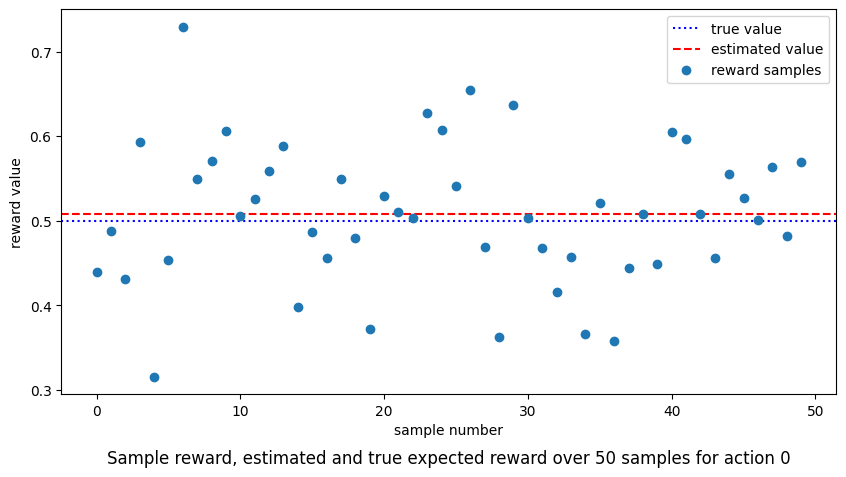

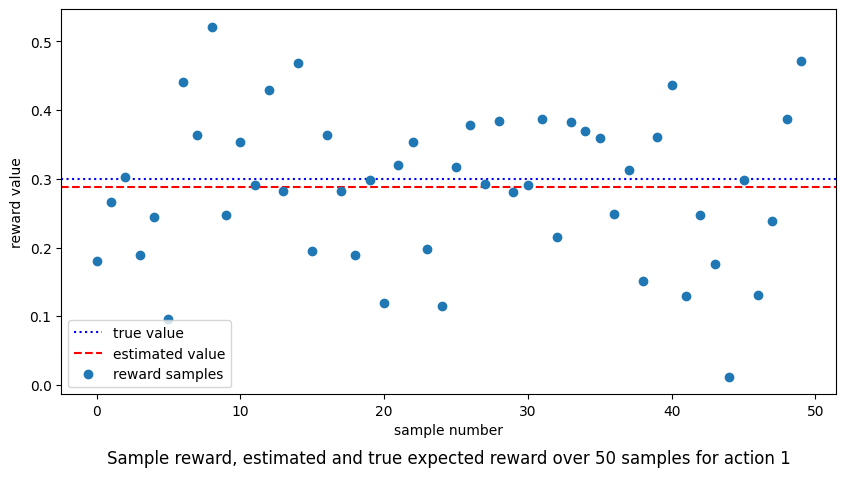

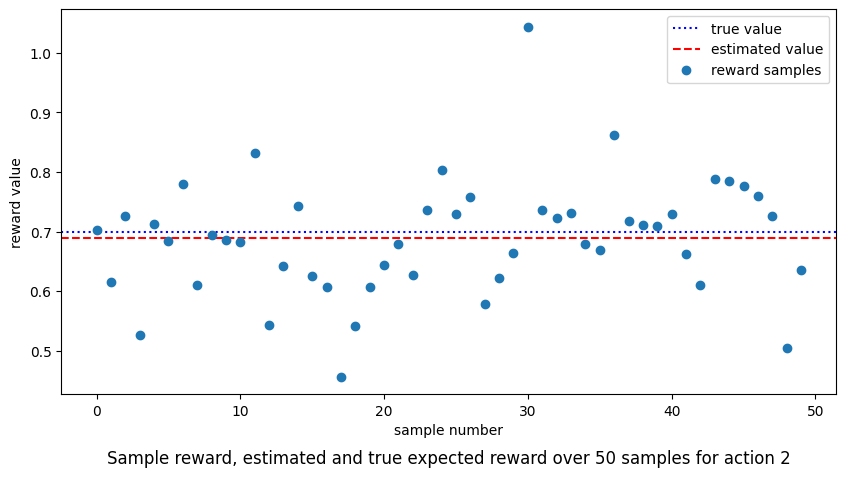

In [4]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  true_value = three_arm_gaussian_bandit.mean[action]
  estimated_value = np.mean(action_rewards[action])

  # draw the line of the true value
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")
  # draw the line of the estimated value
  line_est_val = ax.axhline(y = estimated_value, color = 'r', linestyle = '--', label = "estimated value")
  # plot the reward samples
  plt_samples, = ax.plot(action_rewards[action], 'o', label = "reward samples")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Sample reward, estimated and true expected reward over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, line_est_val, plt_samples])

## Q2 Estimated Q values


In [5]:
def update(reward_samples, alpha):
  """
  Each call to the function yields the current incremental average of the reward with a fixed learning rate, alpha
  E.g. Inital call returns alpha * reward_samples[0], second call returns prev_val + alpha * (reward_samples[1] - prev_val)
  where prev_val is the value return from the previous call, so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  alpha : int
      learning rate parameter for the averaging
  """
  prev_val = 0
  for sample in reward_samples:
    new_val = prev_val + alpha * (sample - prev_val)
    prev_val = new_val
    yield new_val


def updateAvg(reward_samples):
  """
  Each call to the function yields the current incremental average of the reward
  E.g. Inital call returns reward_samples[0], second call returns the average of reward_samples[0] and reward_samples[0], so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  """
  prev_val = reward_samples[0]
  n = 1
  for sample in reward_samples:
    new_val = prev_val + (sample - prev_val) / n
    prev_val = new_val
    n += 1
    yield new_val

def updateDecaying(reward_samples, alpha_0=0.5, lambda_=0.01, p=0.5):
    """
    Each call to the function yields the updated estimate of the action value using an
    improved decaying learning rate.

    Parameters
    ----------
    reward_samples : array-like of int or float
        Samples of reward values from one arm of a bandit.
    alpha_0 : float, optional
        The initial learning rate (default is 0.5).
    lambda_ : float, optional
        The decay rate constant (default is 0.01).
    p : float, optional
        The power parameter for controlling decay (default is 0.5).
    """
    prev_val = 0
    t = 0  # time step counter
    for sample in reward_samples:
        # Calculate current learning rate using decay formula
        alpha_t = alpha_0 / ((1 + lambda_ * t) ** p)
        # Update estimate using current learning rate
        new_val = prev_val + alpha_t * (sample - prev_val)
        prev_val = new_val
        t += 1
        yield new_val


### Graphs


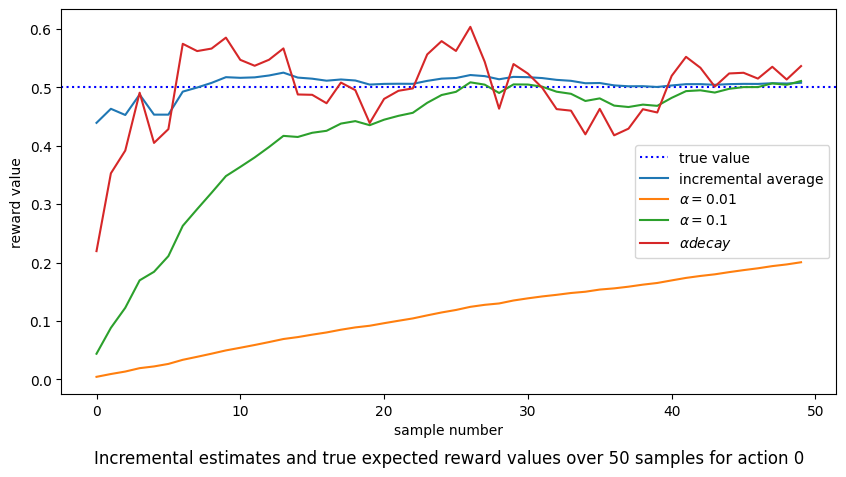

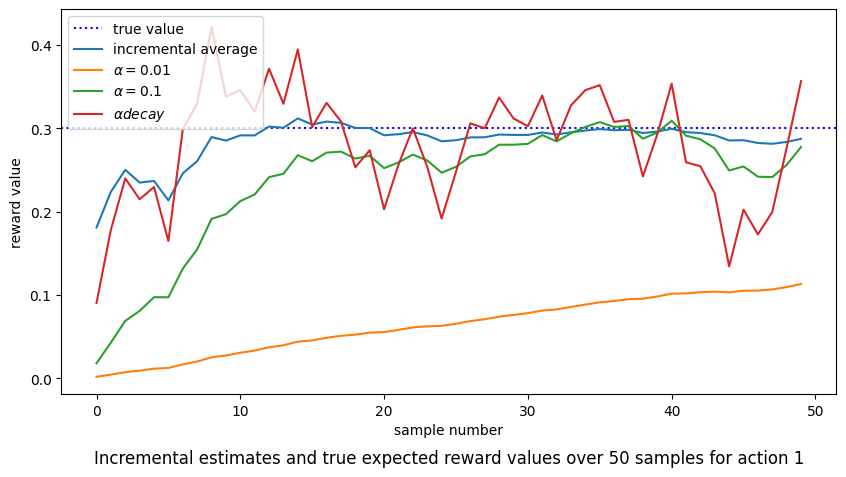

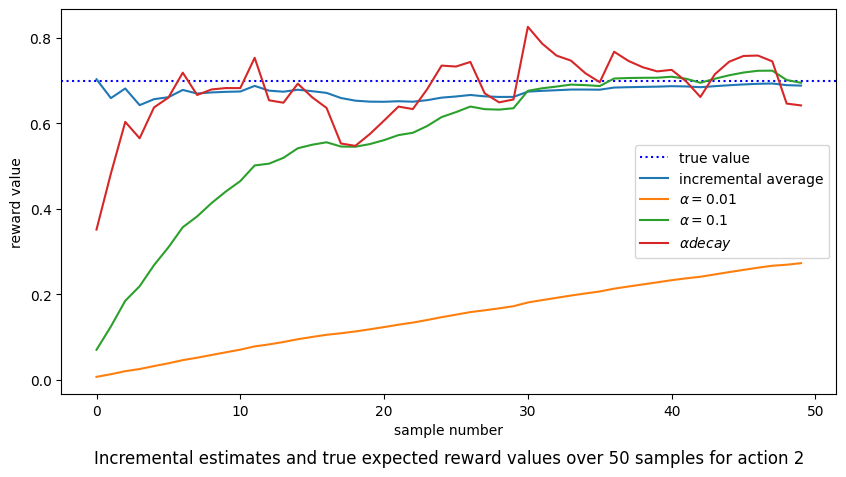

In [6]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  incr_avgs = list(updateAvg(action_rewards[action]))
  alpha_1_percent = list(update(action_rewards[action], 0.01))
  alpha_10_percent = list(update(action_rewards[action], 0.1))
  alpha_decay = list(updateDecaying(action_rewards[action], alpha_0=0.5, lambda_=0.01, p=0.5))
  true_value = three_arm_gaussian_bandit.mean[action]

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # plot incremental values for averaging, alpha = 0.01, alpha = 0.1
  plt_incr_avgs, = ax.plot(incr_avgs, label = "incremental average")
  plt_alpha_1_percent, = ax.plot(alpha_1_percent, label = r"$\alpha = 0.01$")
  plt_alpha_10_percent, = ax.plot(alpha_10_percent, label = r"$\alpha = 0.1$")
  plt_alpha_decay, = ax.plot(alpha_decay, label = r"$\alpha decay$")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent, plt_alpha_decay])

## Q3 Effect of $α$ on Estimated Q values


In [7]:
# TODO:
num_samples = 100

# arrays of the data generated from 100 runs
incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_10_percent_runs = []
alpha_decay_runs = []


# TODO:
for run in range(100):
  # arrays of data generated from the 3 actions in 1 run
  sample_incr_avgs_by_actions = []
  sample_alpha_1_percent_by_actions = []
  sample_alpha_10_percent_by_actions = []
  sample_alpha_decay_by_actions = []

  for action in actions:
    rewards = [three_arm_gaussian_bandit.sample(action) for _ in range(num_samples)]
    sample_incr_avgs_by_actions.append(list(updateAvg(rewards)))
    sample_alpha_1_percent_by_actions.append(list(update(rewards, 0.01)))
    sample_alpha_10_percent_by_actions.append(list(update(rewards, 0.1)))
    sample_alpha_decay_by_actions.append(list(updateDecaying(rewards)))

  incr_avgs_runs.append(sample_incr_avgs_by_actions)
  alpha_1_percent_runs.append(sample_alpha_1_percent_by_actions)
  alpha_10_percent_runs.append(sample_alpha_10_percent_by_actions)
  alpha_decay_runs.append(sample_alpha_decay_by_actions)

# convert to np arrays
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)
alpha_decay_runs = np.asarray(alpha_decay_runs)

### Graphs


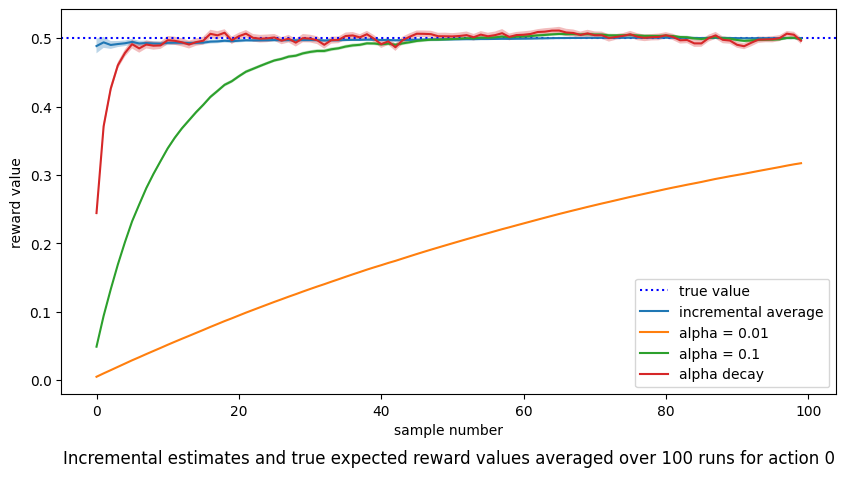

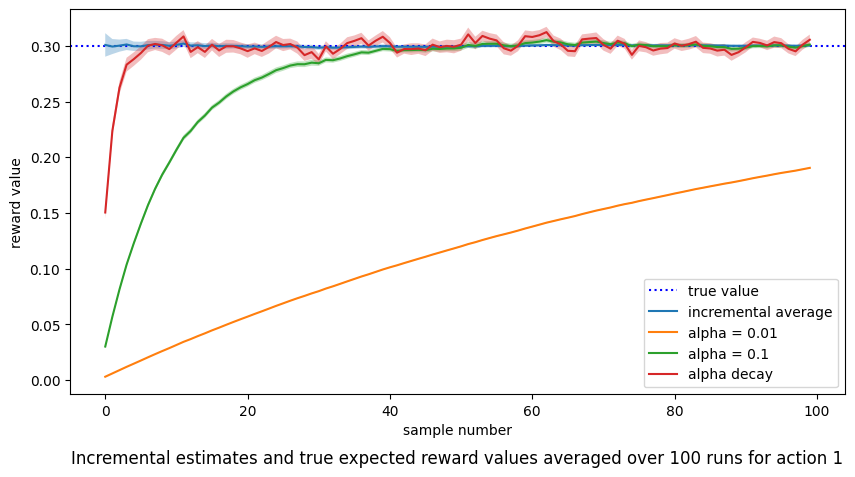

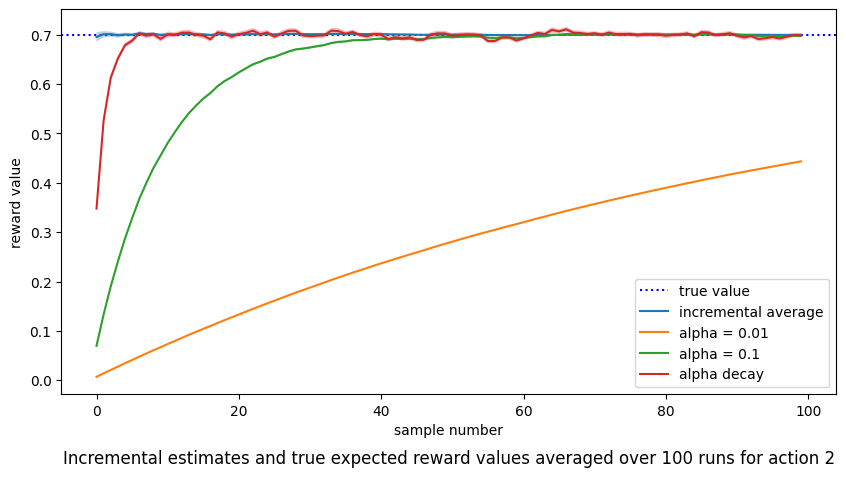

In [8]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  # TODO:
  mean_incr_avgs_by_actions = np.mean(incr_avgs_runs[:, action, :], axis=0)
  mean_alpha_1_percent_by_actions = np.mean(alpha_1_percent_runs[:, action, :], axis=0)
  mean_alpha_10_percent_by_actions = np.mean(alpha_10_percent_runs[:, action, :], axis=0)
  mean_alpha_decay_by_actions = np.mean(alpha_decay_runs[:, action, :], axis=0)

  true_value = three_arm_gaussian_bandit.mean[action]

  # obtain the standard deviation for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_incr_avgs_by_actions = np.std(incr_avgs_runs[:, action, :], axis=0)
  std_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:, action, :], axis=0)
  std_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:, action, :], axis=0)
  std_alpha_decay_by_actions = np.std(alpha_decay_runs[:, action, :], axis=0)

  # obtain the standard error for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_err_incr_avgs_by_actions = std_incr_avgs_by_actions / np.sqrt(100)  # divide by sqrt(num_runs)
  std_err_alpha_1_percent_by_actions = std_alpha_1_percent_by_actions / np.sqrt(100)
  std_err_alpha_10_percent_by_actions = std_alpha_10_percent_by_actions / np.sqrt(100)
  std_err_alpha_decay_by_actions = std_alpha_decay_by_actions / np.sqrt(100)
  
  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = "alpha = 0.01")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = "alpha = 0.1")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)
  
  plt_alpha_decay, = ax.plot(mean_alpha_decay_by_actions, label = "alpha decay")
  alpha_decay_minus_std_err = mean_alpha_decay_by_actions - std_err_alpha_decay_by_actions
  alpha_decay_plus_std_err = mean_alpha_decay_by_actions + std_err_alpha_decay_by_actions
  ax.fill_between(range(0,100), alpha_decay_minus_std_err, alpha_decay_plus_std_err, alpha=0.3)

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values averaged over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent, plt_alpha_decay])

### Answers


Key observations:

1. α = 0.01 vs α = 0.1:

   - 0.01 shows slightly more stable convergence but much slower learning
   - 0.1 learns faster but has slightly higher variance
   - 0.1 generally achieves better final estimates

2. Comparison with other methods:

   - Incremental averaging performs the best over all three arms and seems like most stable
   - Decaying rate learns faster but with higher variance than both α = 0.01 and α = 0.1

3. When is it beneficial to use a decaying learning
   rate?

   - It's beneficial when we want both fast initial learning and stable final estimates
   - Good for cases where we don't know the optimal fixed learning rate in advance

4. If you wanted to optimize further, in what range of α?
   - For better fixed α I would try values between 0.02-0.05
   - For better Decaying α I would experiment with
     - Higher initial α₀ (0.6-0.8) for faster learning
     - Different decay parameters(p=0.3-0.7) to control speed
     - Adjust lambda to fine-tune the decay trajectory


## Q4 Epsilon-greedy


In [9]:
def epsilon_greedy(bandit, epsilon, alpha = None, num_time_step = 1000, epsilon_decay=False, lambda_=0.001):
  """Epsilon greedy algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """
  # TODO:
  num_arms = bandit.num_arms

  # Initialize arrays and counters
  Q_arr = np.zeros(num_arms)  # Estimated values for each arm
  N_arr = np.zeros(num_arms)  # Times each arm was pulled
  total_R = 0  # Total reward
  total_l = 0  # Total regret
  actions = range(num_arms)

  # Find optimal action
  opt_value = max(bandit.mean)
  best_action = np.where(np.array(bandit.mean) == opt_value)[0]

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  
  epsilon_t = epsilon 

  for time_step in range(num_time_step):
    # Update epsilon if using decay
    if epsilon_decay:
        epsilon_t = epsilon / (1 + lambda_ * time_step)
        
    # Choose action using epsilon-greedy strategy
    if np.random.random() > epsilon_t:
        # Exploit: choose random among maximum value actions
        max_Q = np.max(Q_arr)
        A_star = np.random.choice(np.where(Q_arr == max_Q)[0])
        A = A_star
    else:
        # Explore: choose random action
        A = np.random.choice(actions)
    
    # Get reward and update counters
    curr_R = bandit.sample(A)
    N_arr[A] += 1

    if alpha is None:
        # Incremental averaging
        Q_arr[A] = Q_arr[A] + (curr_R - Q_arr[A]) / N_arr[A]
    else:
        # Fixed learning rate
        Q_arr[A] = Q_arr[A] + alpha * (curr_R - Q_arr[A])

    # Store instantaneous reward
    R_over_t.append(curr_R)

    # Update and store cumulative reward
    total_R += curr_R
    total_R_over_t.append(total_R)

    # Check if estimated best action matches true best
    est_is_best = 1 if A in best_action else 0
    est_is_best_over_t.append(est_is_best)

    # Calculate and store regret
    l_t = opt_value - bandit.mean[A]
    l_over_t.append(l_t)

    total_l += l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs


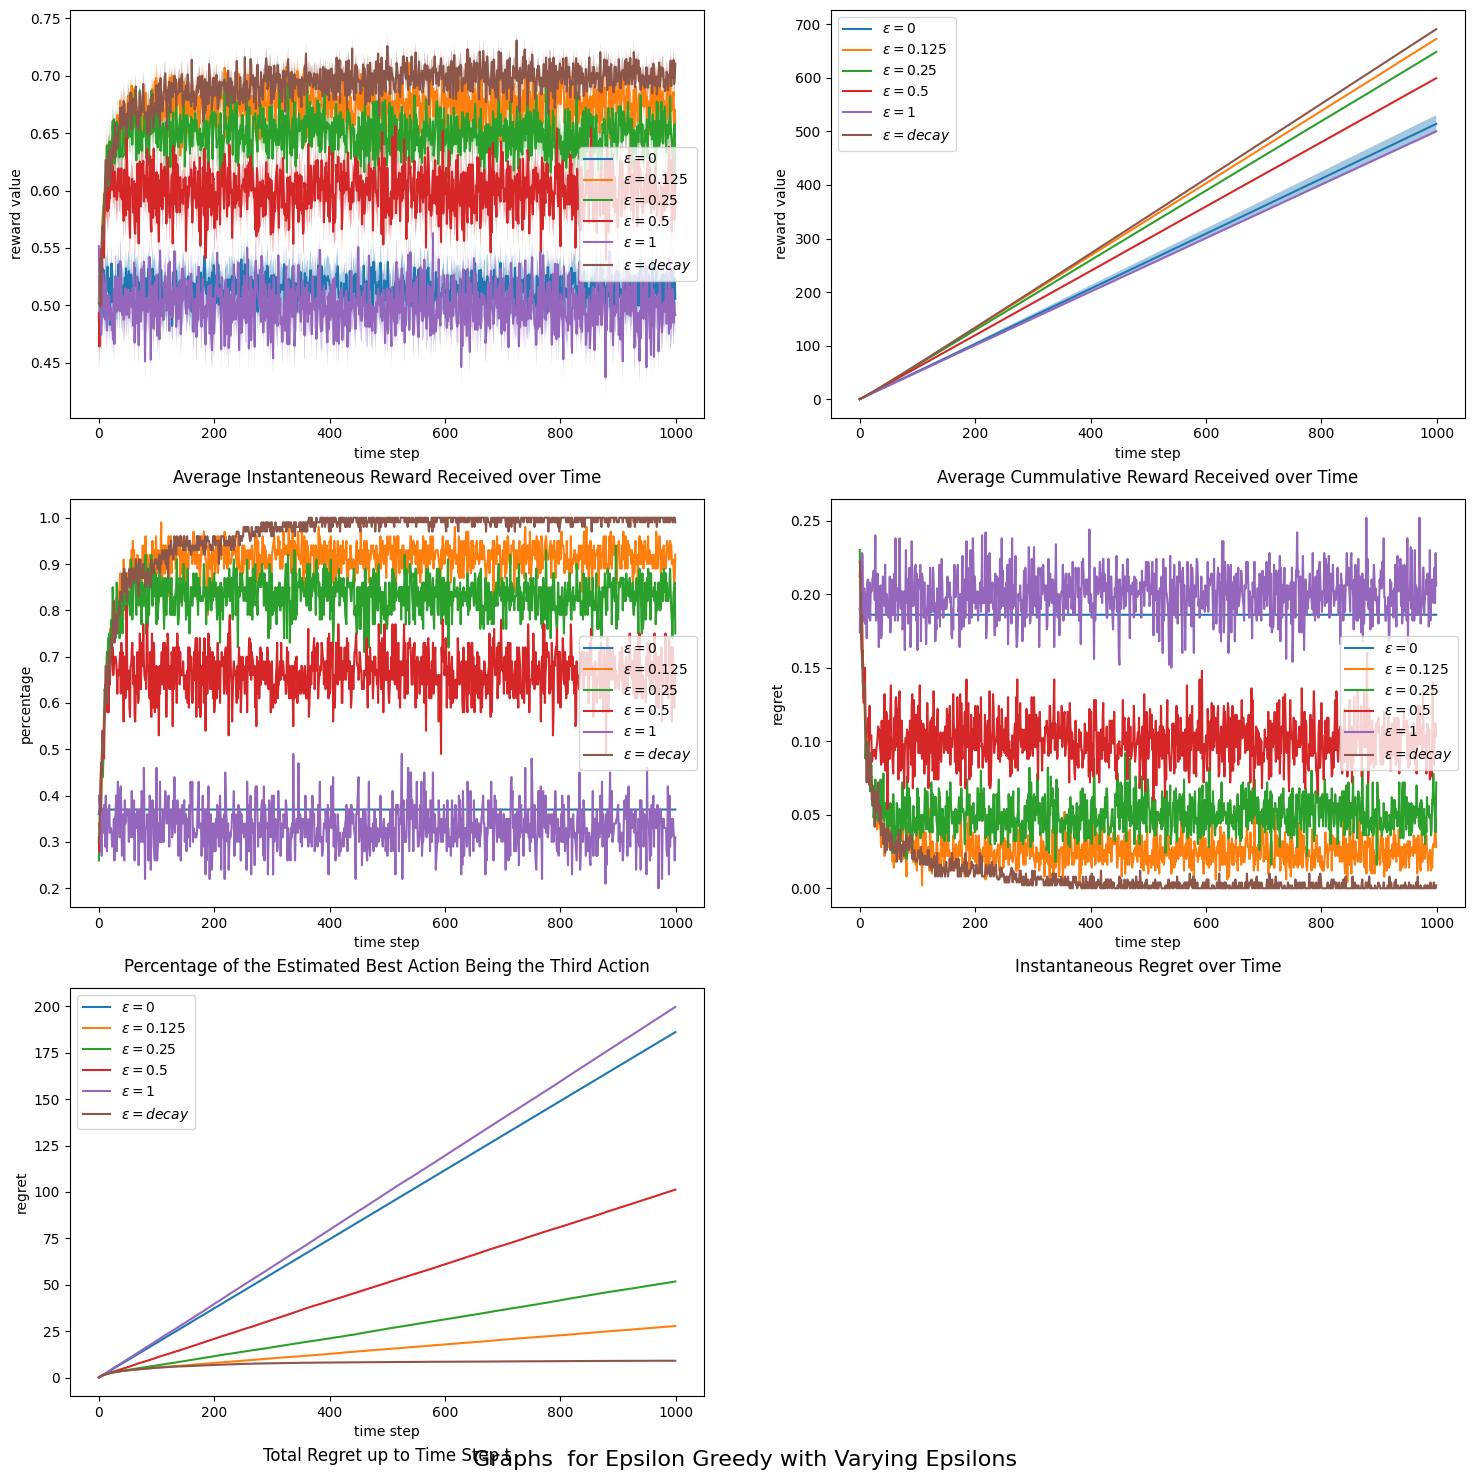

In [10]:
#TODO:
epsilons = [0, 1/8, 1/4, 1/2, 1]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}  # Decaying epsilon parameters

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons + ["decay"]:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if epsilon == "decay":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_gaussian_bandit, 
          decaying_epsilon_params['epsilon_0'], 
          epsilon_decay=True, 
          lambda_=decaying_epsilon_params['lambda_']
      )
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_gaussian_bandit, 
          epsilon
      )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the Third Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs  for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers


• **Instantaneous Rewards**

- Decaying ε performs best by adapting exploration over time (0.5 → 0)
- Fixed rates: moderate values (ε=0.125, 0.25) outperform extremes
- Pure strategies (ε=0, 1) perform worst due to lack of balance

• **Cumulative Rewards**

- Fastest accumulation: decaying ε > 0.125 > 0.25 > 0.5 > 0 > 1
- Demonstrates long-term advantage of adaptive exploration
- Well-tuned fixed ε (0.125) nearly matches adaptive strategy

• **Optimal Action Selection**

- Decaying ε achieves fastest recognition of optimal action
- ε=0.125 shows similar but slower learning curve
- ε=0: locked into initial choice (flat line)
- ε=1: fails to develop preferences (random selection)

• **Instantaneous Regret**

- Lowest: decaying ε and ε=0.125
- Moderate: ε=0.25, 0.5 (due to continued exploration)
- Highest: ε=0 (premature commitment), ε=1 (excessive exploration)

• **Total Regret**

- Best performers: decaying ε ≈ ε=0.125
- Medium rates (0.25, 0.5): faster regret accumulation
- Worst performers: extreme strategies (0, 1)

• **Insights**

- Decaying ε provides optimal balance of exploration/exploitation
- Fixed ε=0.125 offers good performance with simpler implementation
- Extreme strategies consistently underperform
- Choice between fixed/decaying ε depends on simplicity vs. performance needs


## Q5 Hyperparameters for Epsilon-greedy


To have a plain start, you have been provided with predefined functions for generating plots until now. However, moving forward, you are expected to plot graphs on your own.


### Graphs


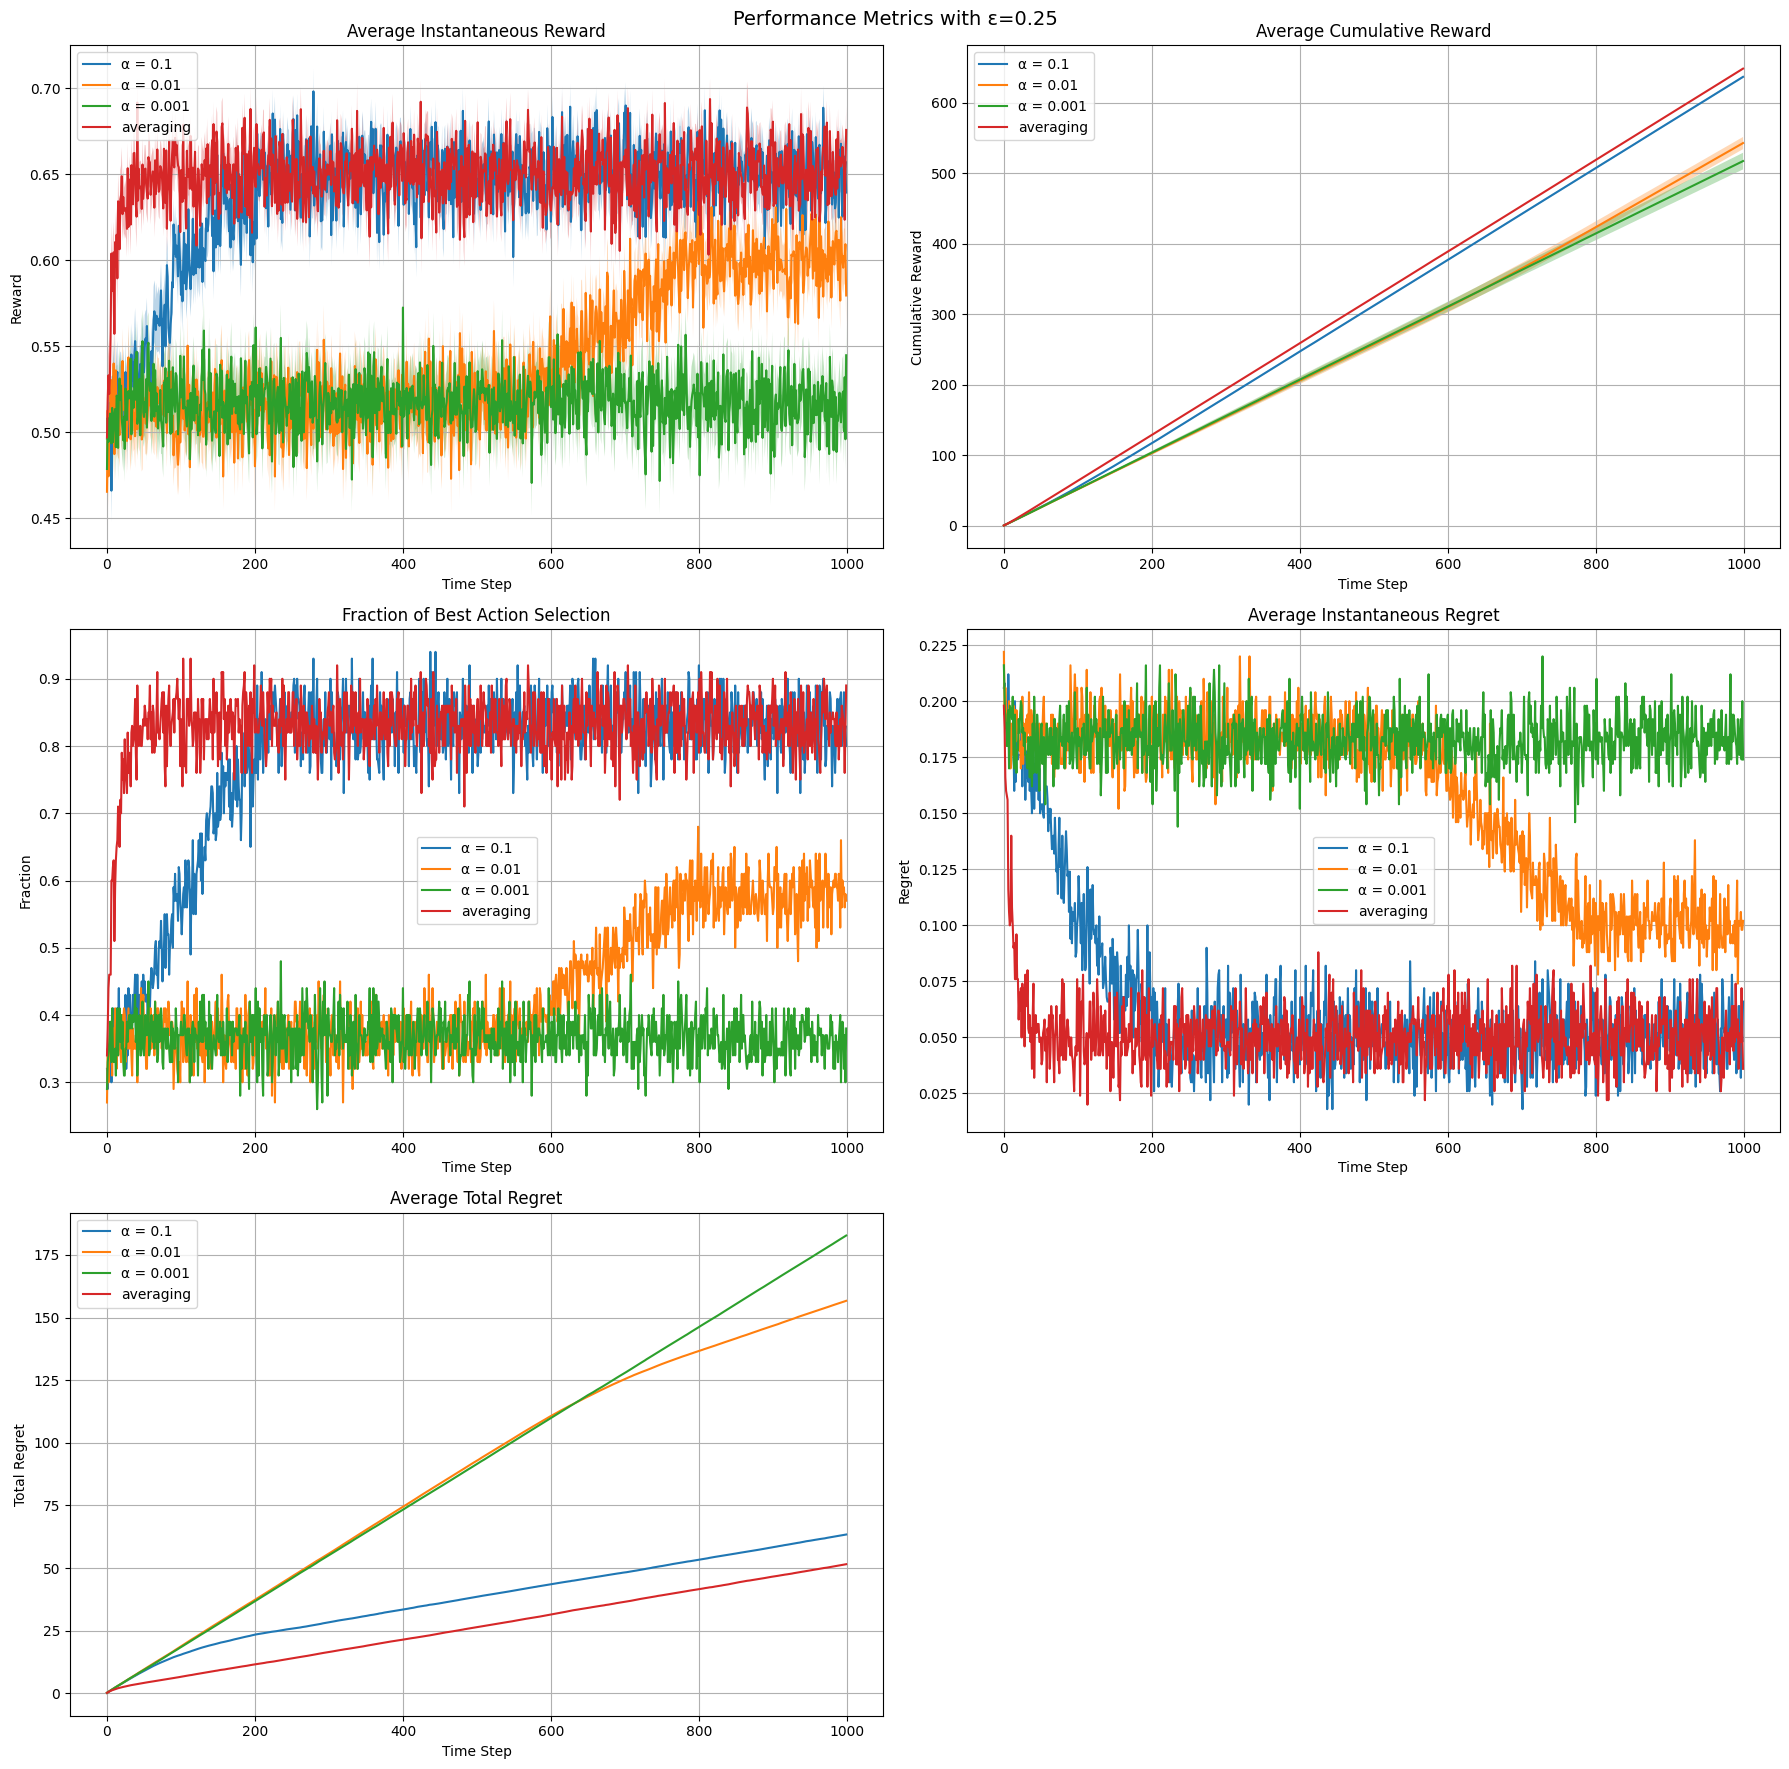

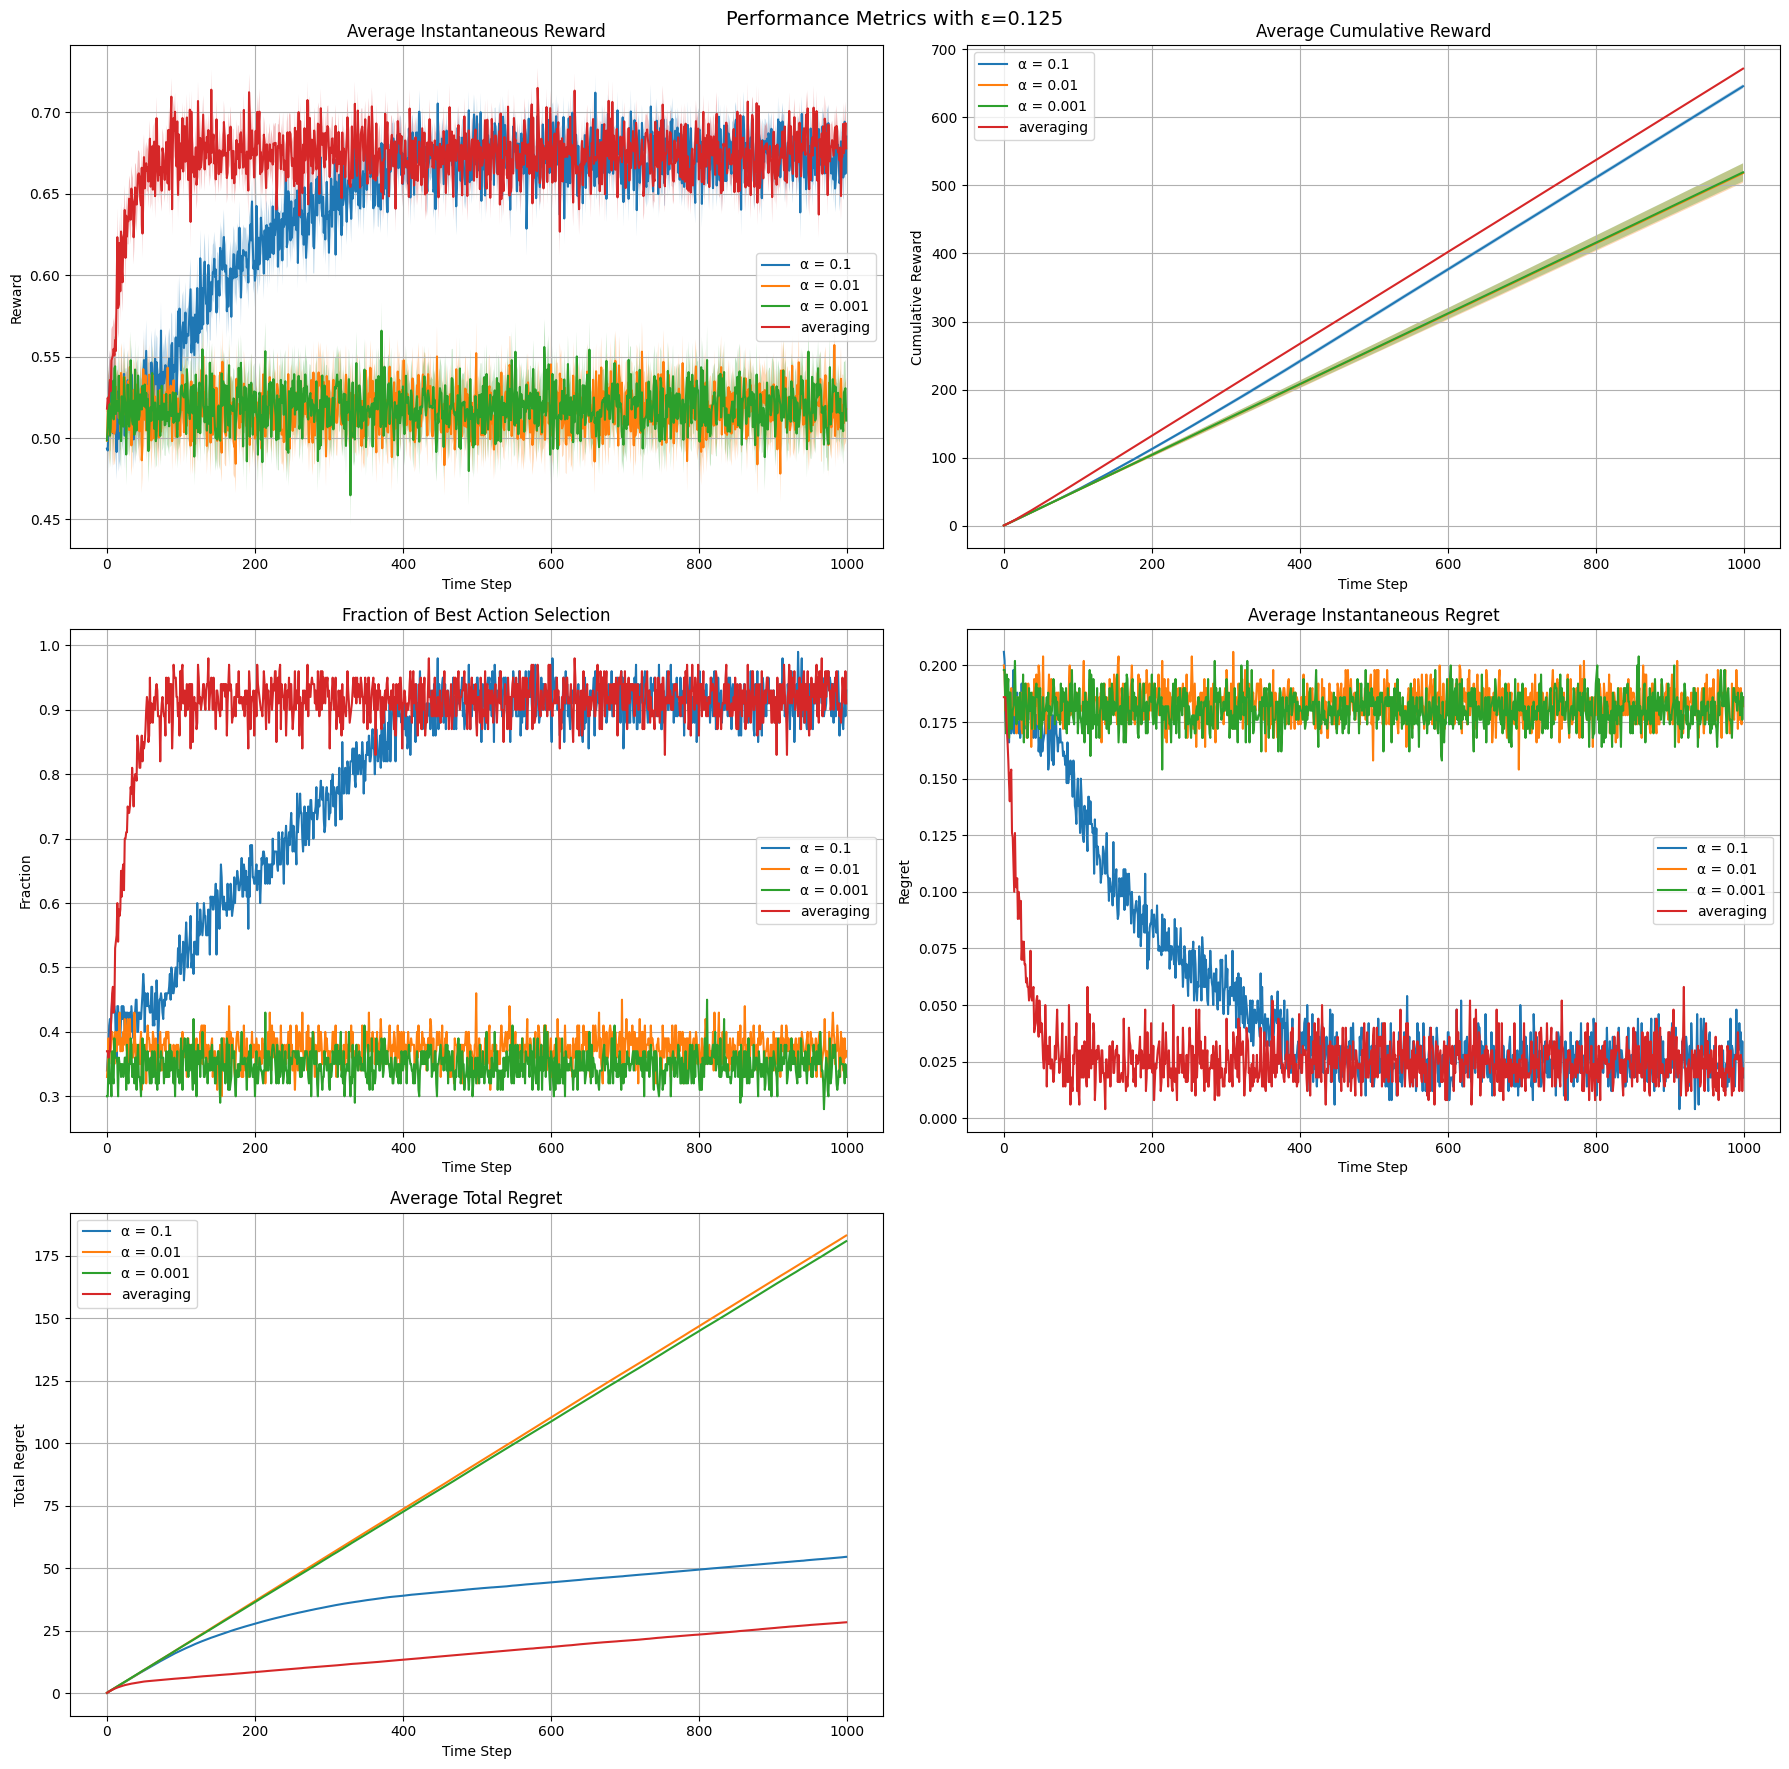

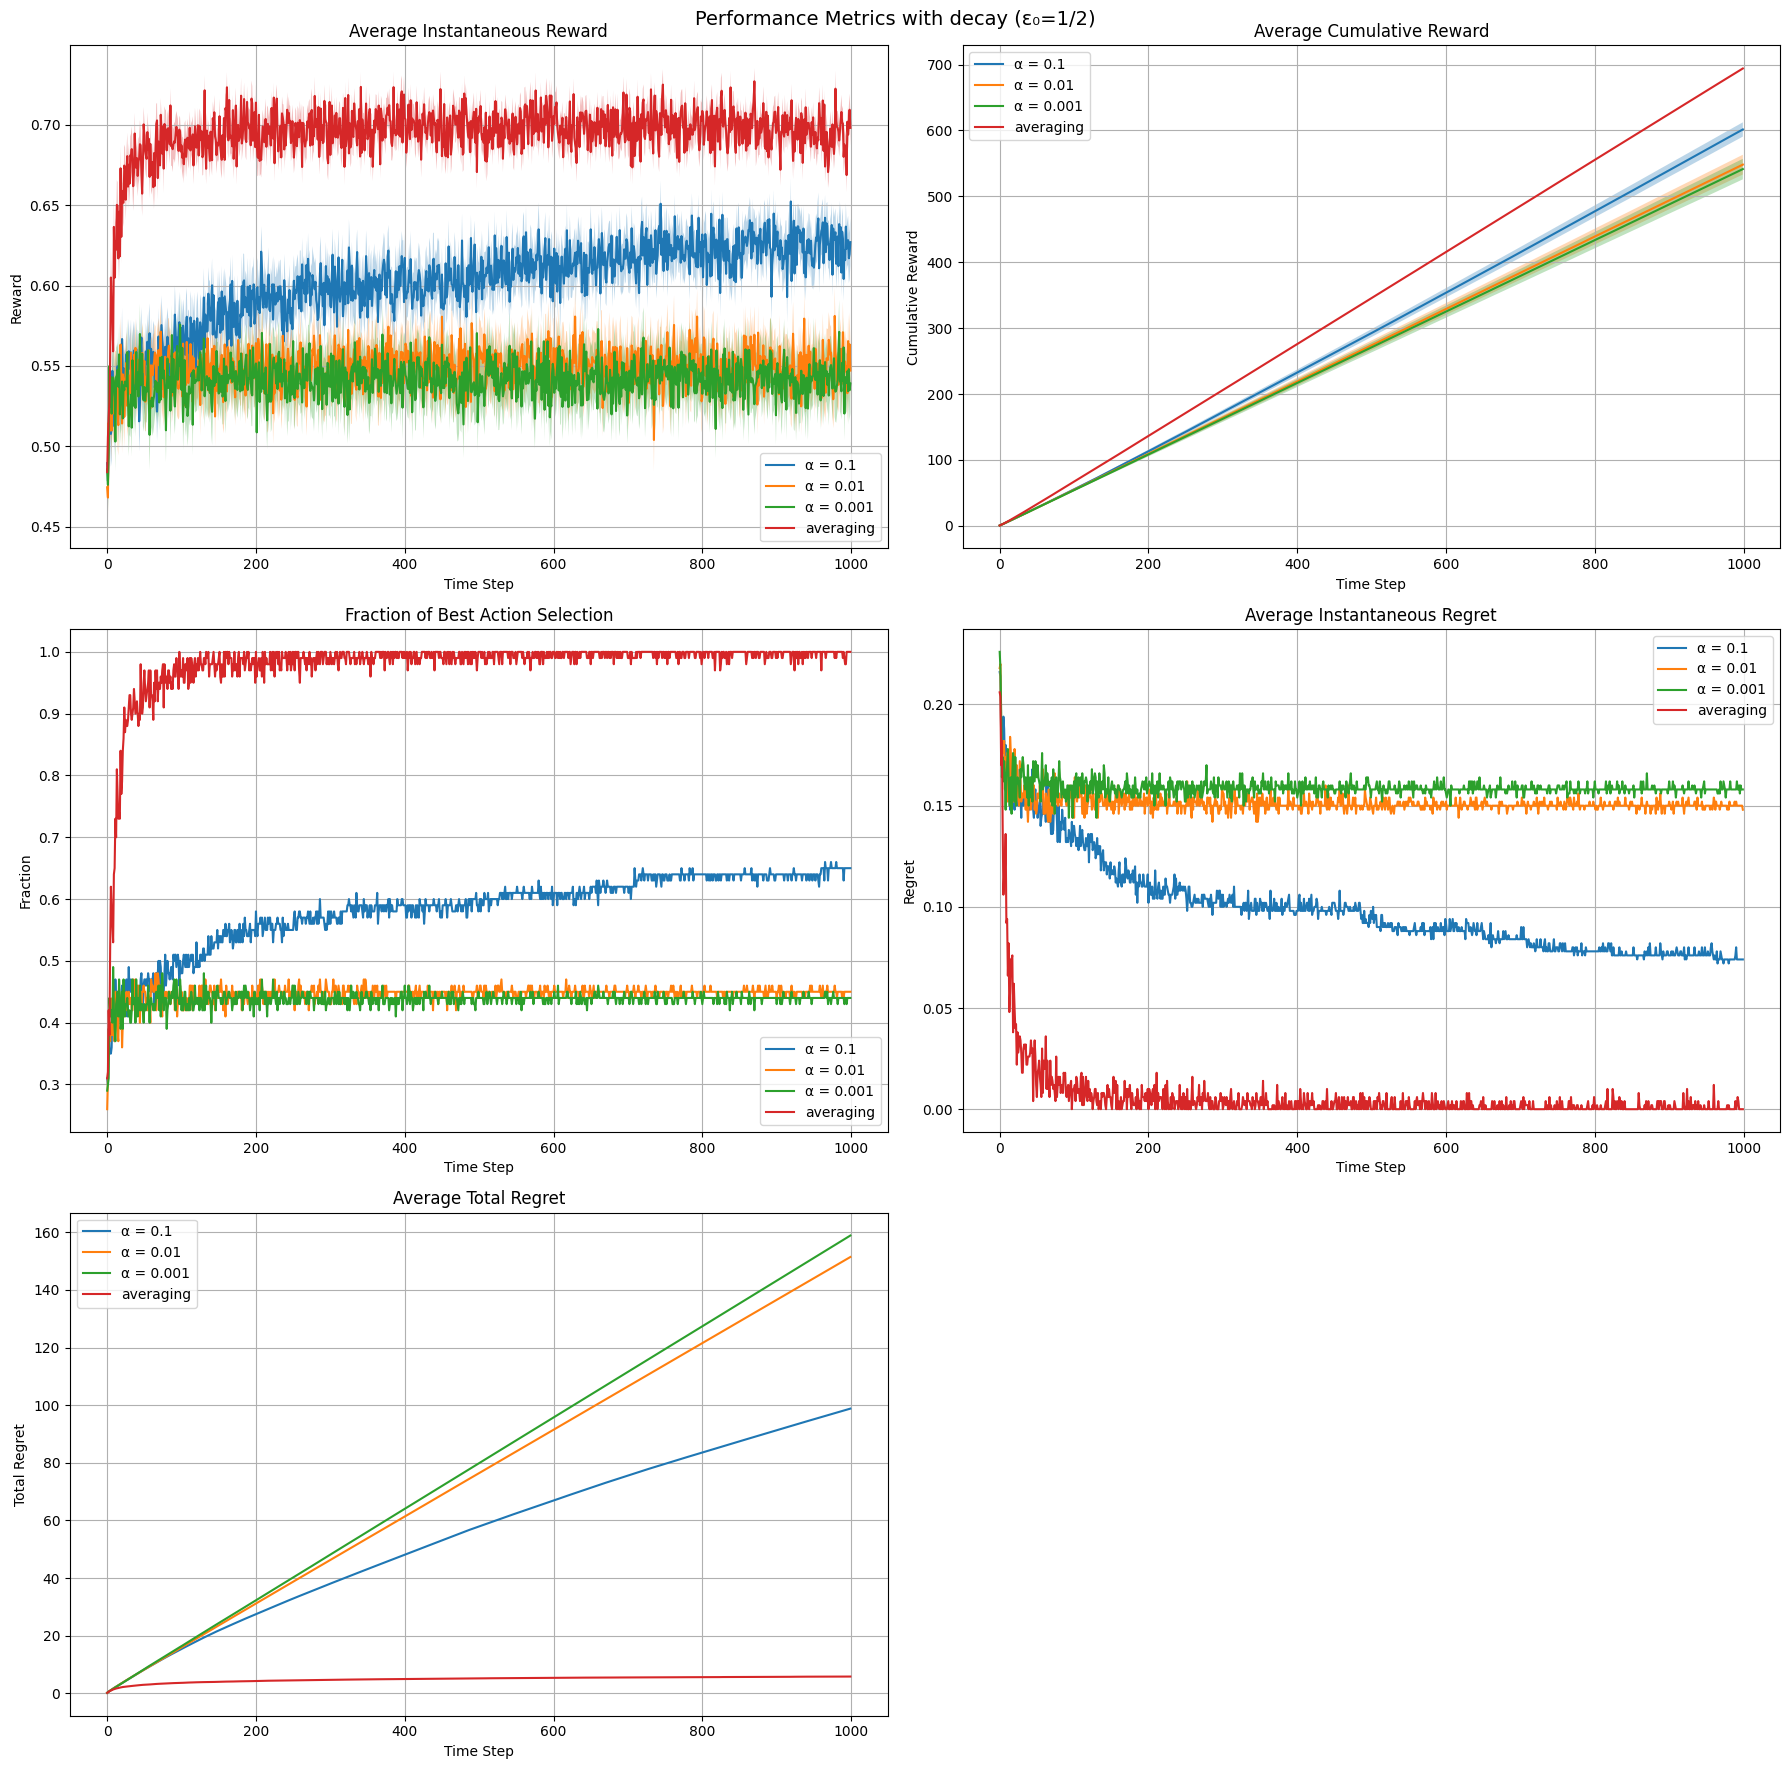

In [11]:
epsilons = [1/4, 1/8, "decay"] 
alphas = [0.1, 0.01, 0.001, None]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}

# Run experiments for each epsilon
for epsilon in epsilons:
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
    
    for alpha in alphas:
        R_over_t_runs = []
        total_R_over_t_runs = []
        est_is_best_over_t_runs = []
        l_over_t_runs = []
        total_l_over_t_runs = []

        # Run 100 experiments
        for run in range(100):
            if epsilon == "decay":
                results = epsilon_greedy(
                    three_arm_gaussian_bandit,
                    decaying_epsilon_params['epsilon_0'],
                    alpha=alpha,
                    epsilon_decay=True,
                    lambda_=decaying_epsilon_params['lambda_']
                )
            else:
                results = epsilon_greedy(
                    three_arm_gaussian_bandit,
                    epsilon=epsilon,
                    alpha=alpha
                )
            
            R_over_t_runs.append(results[0])
            total_R_over_t_runs.append(results[1])
            est_is_best_over_t_runs.append(results[2])
            l_over_t_runs.append(results[3])
            total_l_over_t_runs.append(results[4])

        # Convert to numpy arrays
        R_over_t_runs = np.array(R_over_t_runs)
        total_R_over_t_runs = np.array(total_R_over_t_runs)
        est_is_best_over_t_runs = np.array(est_is_best_over_t_runs)
        l_over_t_runs = np.array(l_over_t_runs)
        total_l_over_t_runs = np.array(total_l_over_t_runs)

        # Calculate statistics and plot
        # 1. Average instantaneous reward
        mean_R = np.mean(R_over_t_runs, axis=0)
        std_err_R = np.std(R_over_t_runs, axis=0) / np.sqrt(100)
        label = "averaging" if alpha is None else f"α = {alpha}"
        axs[0,0].plot(mean_R, label=label)
        axs[0,0].fill_between(range(1000), mean_R - std_err_R, mean_R + std_err_R, alpha=0.3)
        axs[0,0].set_title("Average Instantaneous Reward")
        axs[0,0].set_xlabel("Time Step")
        axs[0,0].set_ylabel("Reward")

        # 2. Cumulative reward
        mean_total_R = np.mean(total_R_over_t_runs, axis=0)
        std_err_total_R = np.std(total_R_over_t_runs, axis=0) / np.sqrt(100)
        axs[0,1].plot(mean_total_R, label=label)
        axs[0,1].fill_between(range(1000), mean_total_R - std_err_total_R,
                            mean_total_R + std_err_total_R, alpha=0.3)
        axs[0,1].set_title("Average Cumulative Reward")
        axs[0,1].set_xlabel("Time Step")
        axs[0,1].set_ylabel("Cumulative Reward")

        # 3. Best action selection
        mean_best = np.mean(est_is_best_over_t_runs, axis=0)
        axs[1,0].plot(mean_best, label=label)
        axs[1,0].set_title("Fraction of Best Action Selection")
        axs[1,0].set_xlabel("Time Step")
        axs[1,0].set_ylabel("Fraction")

        # 4. Instantaneous regret
        mean_regret = np.mean(l_over_t_runs, axis=0)
        axs[1,1].plot(mean_regret, label=label)
        axs[1,1].set_title("Average Instantaneous Regret")
        axs[1,1].set_xlabel("Time Step")
        axs[1,1].set_ylabel("Regret")

        # 5. Total regret
        mean_total_regret = np.mean(total_l_over_t_runs, axis=0)
        axs[2,0].plot(mean_total_regret, label=label)
        axs[2,0].set_title("Average Total Regret")
        axs[2,0].set_xlabel("Time Step")
        axs[2,0].set_ylabel("Total Regret")

    for ax in axs.flat[:-1]:
        ax.legend()
        ax.grid(True)

    axs[-1,-1].axis('off')
    eps_str = "decay (ε₀=1/2)" if epsilon == "decay" else f"ε={epsilon}"
    fig.suptitle(f"Performance Metrics with {eps_str}", fontsize=14)
    plt.tight_layout()
    plt.show()

### Answers


Across all three exploration strategies (ε=1/4, ε=1/8, and decaying ε), incremental averaging consistently demonstrates superior performance with more stable learning and better long-term convergence compared to fixed learning rates, while among fixed rates, α=0.1 shows faster initial learning but higher variance, and α=0.001 shows slower but more stable learning. Decaying ε with incremental averaging yields the best overall performance by combining adaptive exploration with stable value estimation, particularly in minimizing regret and maximizing the selection of optimal actions.


## Q6 Gradient Bandit


In [12]:
def softmax(preferences):
    """Convert preference values to probabilities using softmax."""
    exp_pref = np.exp(preferences)
    return exp_pref / np.sum(exp_pref)

def gradient_bandit(bandit, alpha, num_time_step=1000, alpha_decay=False, alpha_0=0.5, lambda_=0.01, p=0.5):
    """Gradient bandit algorithm with baseline.
    
    Parameters
    ----------
    bandit : GaussianBandit class
        The multi-armed bandit environment
    alpha : float or None
        Learning rate (if None, uses decaying rate)
    num_time_step : int
        Number of time steps to run
    alpha_decay : bool
        Whether to use decaying learning rate
    alpha_0, lambda_, p : float
        Parameters for decaying learning rate
    """
    num_arms = bandit.num_arms
    H = np.zeros(num_arms)  # Preference values for each action
    baseline = 0  # Average reward (baseline)
    total_R = 0
    total_l = 0
    
    # Find optimal action for regret calculation
    opt_value = max(bandit.mean)
    best_action = np.where(np.array(bandit.mean) == opt_value)[0]
    
    # Initialize metrics lists
    R_over_t = []
    total_R_over_t = []
    est_is_best_over_t = []
    l_over_t = []
    total_l_over_t = []
    
    for t in range(num_time_step):
        # Calculate current learning rate if using decay
        if alpha_decay:
            alpha_t = alpha_0 / ((1 + lambda_ * t) ** p)
        else:
            alpha_t = alpha
            
        # Calculate action probabilities using softmax
        probs = softmax(H)
        
        # Choose action based on probabilities
        A = np.random.choice(range(num_arms), p=probs)
        
        # Get reward
        R = bandit.sample(A)
        
        # Update baseline (average reward)
        baseline = baseline + (1/max(1, t+1)) * (R - baseline)
        
        # Calculate reward relative to baseline
        relative_reward = R - baseline
        
        # Update preferences using gradient ascent
        for a in range(num_arms):
            if a == A:
                # For selected action
                H[a] = H[a] + alpha_t * relative_reward * (1 - probs[a])
            else:
                # For non-selected actions
                H[a] = H[a] - alpha_t * relative_reward * probs[a]
        
        # Store metrics
        R_over_t.append(R)
        total_R += R
        total_R_over_t.append(total_R)
        
        # Check if highest probability action matches true best
        est_best = 1 if np.argmax(probs) in best_action else 0
        est_is_best_over_t.append(est_best)
        
        # Calculate regret
        l_t = opt_value - bandit.mean[A]
        l_over_t.append(l_t)
        total_l += l_t
        total_l_over_t.append(total_l)
    
    return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs


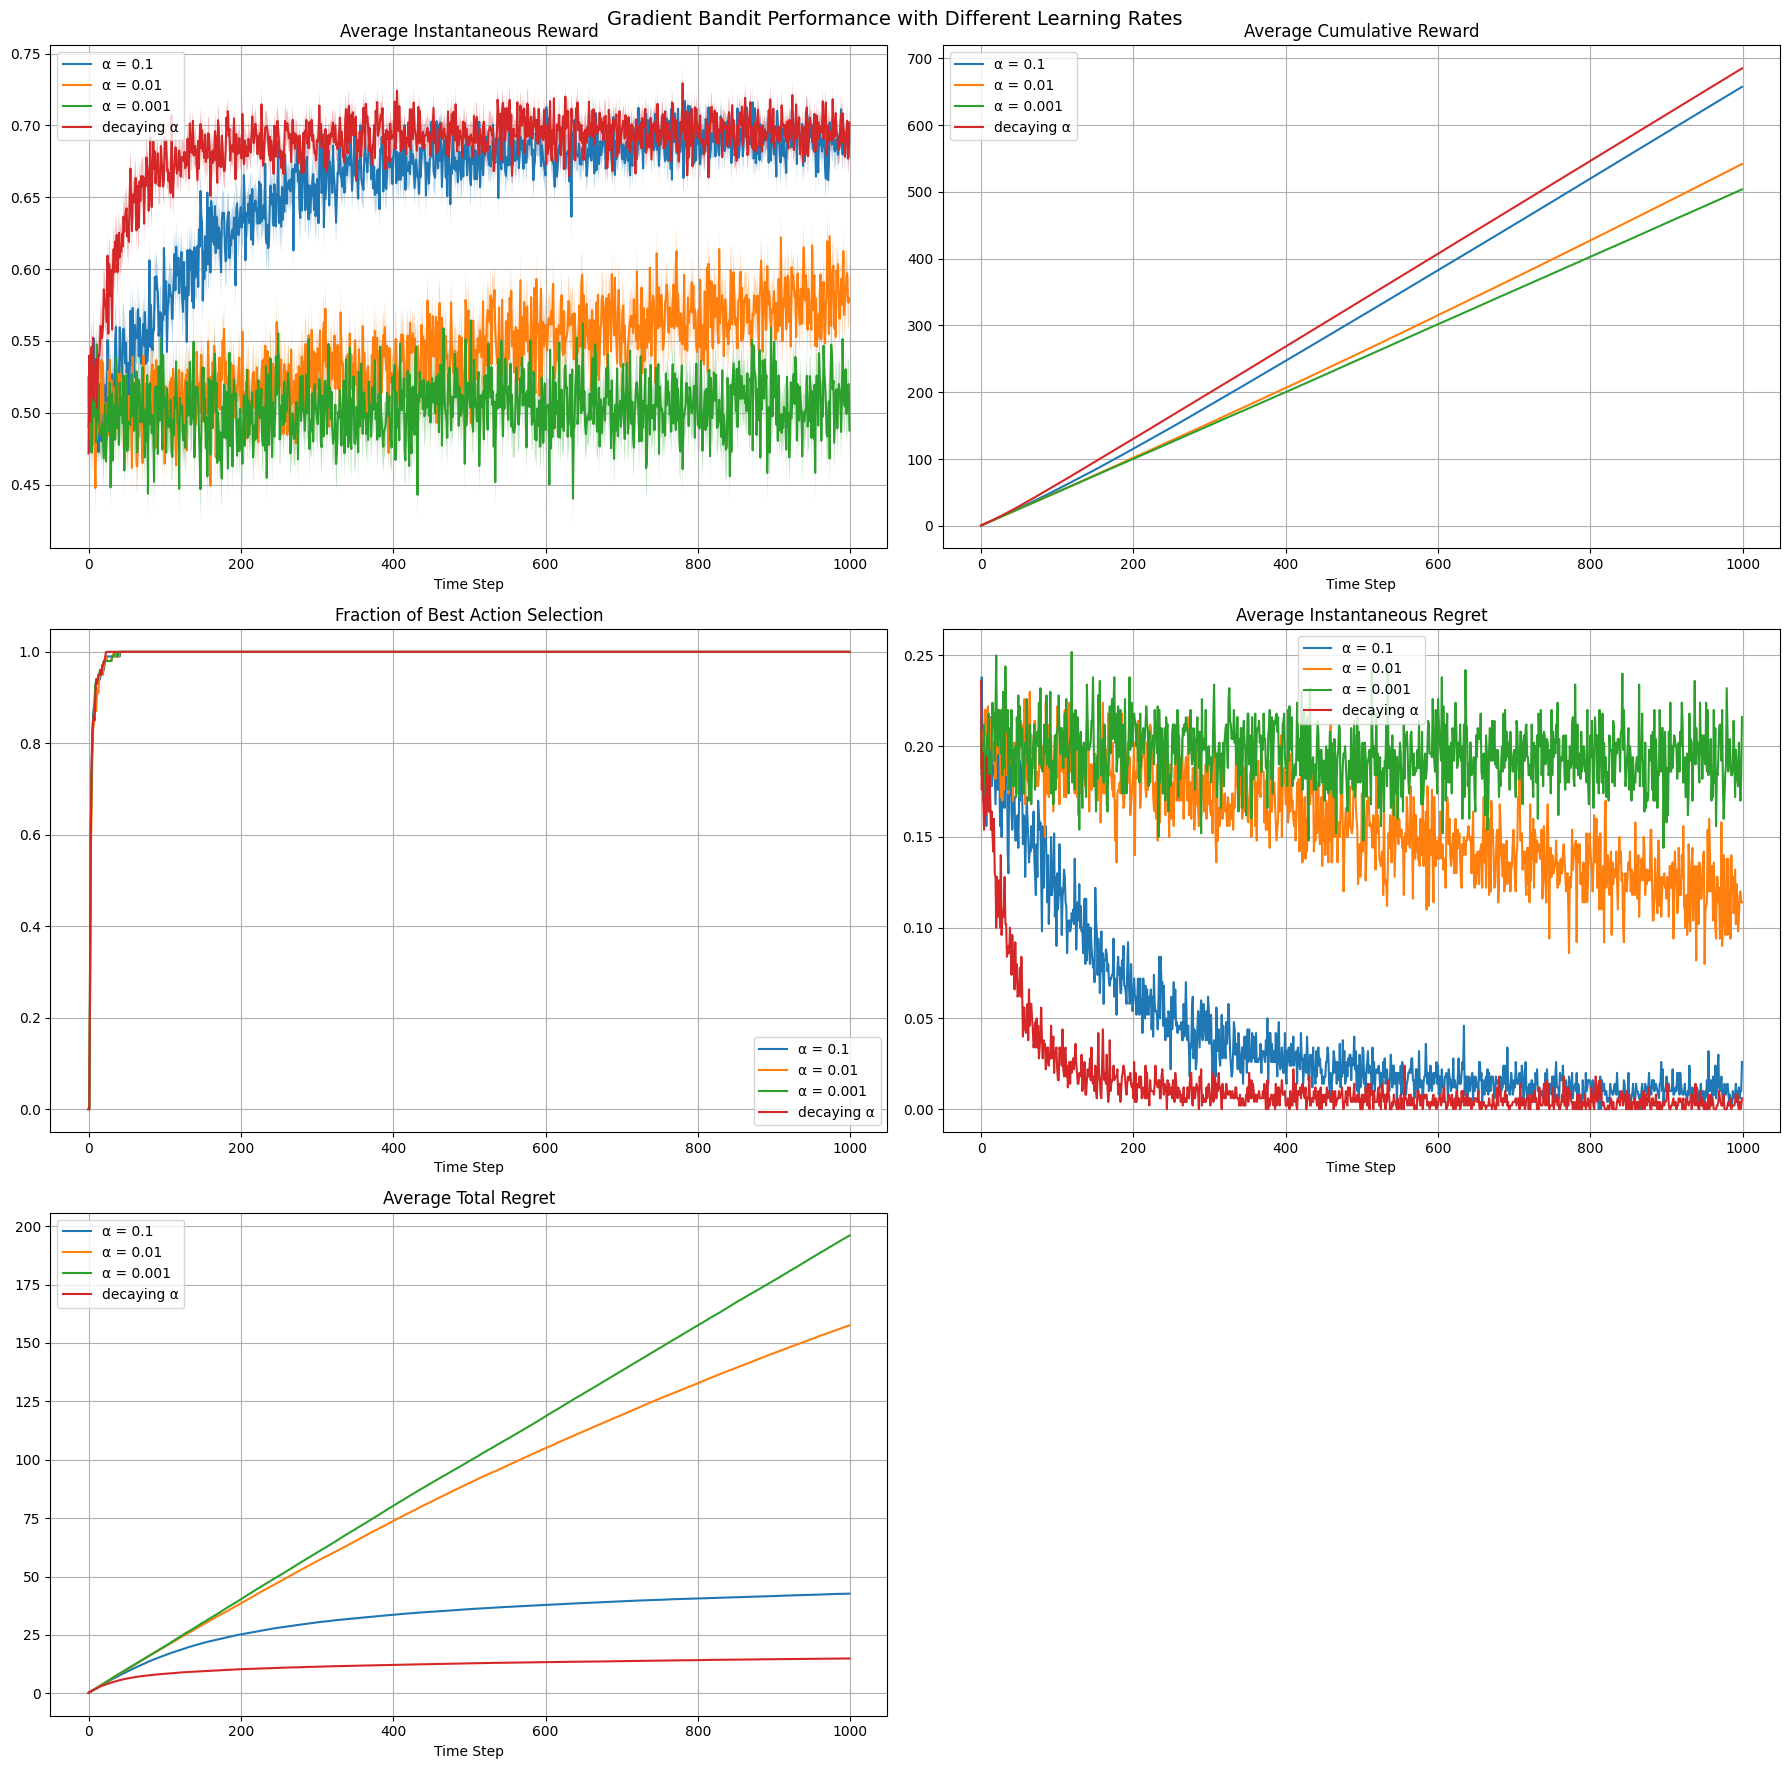

In [13]:
# Initialize bandit
delta = 0.2
num_arms = 3
means = [0.5, 0.5 - delta, 0.5 + delta]
variance = 0.01
three_arm_gaussian_bandit = GaussianBandit(num_arms, means, variance)

# Setup experiments
alphas = [0.1, 0.01, 0.001, "decay"]
alpha_decay_params = {'alpha_0': 0.5, 'lambda_': 0.01, 'p': 0.5}

# Create plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for alpha in alphas:
    # Arrays for storing results
    R_over_t_runs = []
    total_R_over_t_runs = []
    est_is_best_over_t_runs = []
    l_over_t_runs = []
    total_l_over_t_runs = []
    
    # Run 100 experiments
    for run in range(100):
        if alpha == "decay":
            results = gradient_bandit(
                three_arm_gaussian_bandit,
                None,
                alpha_decay=True,
                alpha_0=alpha_decay_params['alpha_0'],
                lambda_=alpha_decay_params['lambda_'],
                p=alpha_decay_params['p']
            )
        else:
            results = gradient_bandit(
                three_arm_gaussian_bandit,
                alpha
            )
        
        R_over_t_runs.append(results[0])
        total_R_over_t_runs.append(results[1])
        est_is_best_over_t_runs.append(results[2])
        l_over_t_runs.append(results[3])
        total_l_over_t_runs.append(results[4])
    
    # Convert to numpy arrays
    arrays = [np.array(x) for x in [R_over_t_runs, total_R_over_t_runs,
                                  est_is_best_over_t_runs, l_over_t_runs,
                                  total_l_over_t_runs]]
    
    # Plot metrics with standard error bands
    label = f"α = {alpha}" if alpha != "decay" else "decaying α"
    
    # 1. Average instantaneous reward
    mean_R = np.mean(arrays[0], axis=0)
    std_err_R = np.std(arrays[0], axis=0) / np.sqrt(100)
    axs[0,0].plot(mean_R, label=label)
    axs[0,0].fill_between(range(1000), mean_R - std_err_R, mean_R + std_err_R, alpha=0.3)
    
    # 2. Cumulative reward
    mean_total_R = np.mean(arrays[1], axis=0)
    std_err_total_R = np.std(arrays[1], axis=0) / np.sqrt(100)
    axs[0,1].plot(mean_total_R, label=label)
    axs[0,1].fill_between(range(1000), mean_total_R - std_err_total_R,
                         mean_total_R + std_err_total_R, alpha=0.3)
    
    # 3. Best action selection
    mean_best = np.mean(arrays[2], axis=0)
    axs[1,0].plot(mean_best, label=label)
    
    # 4. Instantaneous regret
    mean_regret = np.mean(arrays[3], axis=0)
    axs[1,1].plot(mean_regret, label=label)
    
    # 5. Total regret
    mean_total_regret = np.mean(arrays[4], axis=0)
    axs[2,0].plot(mean_total_regret, label=label)

# Set titles and labels
titles = ['Average Instantaneous Reward', 
          'Average Cumulative Reward',
          'Fraction of Best Action Selection',
          'Average Instantaneous Regret',
          'Average Total Regret']

for i, title in enumerate(titles):
    row = i // 2
    col = i % 2
    axs[row,col].set_title(title)
    axs[row,col].set_xlabel('Time Step')
    axs[row,col].legend()
    axs[row,col].grid(True)

# Remove empty subplot
axs[-1,-1].remove()

plt.suptitle('Gradient Bandit Performance with Different Learning Rates', fontsize=14)
plt.tight_layout()
plt.show()

### Answers


Looking at the results, we observe several interesting patterns:

1. Higher learning rates (α = 0.1) lead to faster initial learning but more variance in the long run
2. The decaying learning rate (starting at α₀ = 0.5) has both benefits of: fast initial learning followed by increasing stability
3. The baseline helps reduce variance in updates by accounting for the overall reward level

The gradient bandit tends to perform more consistently than ε-greedy because it maintains continuous probabilities rather than making hard explore/exploit decisions. This allows it to naturally adjust its exploration based on the relative preferences it has learned for each action.


## Q7 Thompson Sampling


In [23]:
def thompson_sampling(bandit, prior_mean=0, prior_var=1.0, num_time_step=1000):
    """
    Thompson sampling algorithm for Gaussian bandits.
    
    Maintains Gaussian posteriors over each arm's mean reward.
    At each step:
    1. Samples a value from each arm's posterior distribution
    2. Selects the arm with highest sampled value
    3. Updates posterior with observed reward using Bayesian update
    
    Parameters
    ----------
    bandit : GaussianBandit class
        The multi-armed bandit environment
    num_time_step : int
        Number of time steps to run
    """
    num_arms = bandit.num_arms
    n = np.zeros(num_arms)
    sum_r = np.zeros(num_arms)
    bandit_var = bandit.variance
    
    # Metrics storage
    R_over_t = []
    total_R_over_t = []
    est_is_best_over_t = []
    l_over_t = []
    total_l_over_t = []
    
    total_R = 0
    total_l = 0
    opt_value = max(bandit.mean)
    best_action = np.where(np.array(bandit.mean) == opt_value)[0]
    
    for t in range(num_time_step):
        sampled_means = []
        for a in range(num_arms):
            if n[a] == 0:
                # Use prior distribution
                sampled_mean = np.random.normal(prior_mean, np.sqrt(prior_var))
            else:
                post_mean = sum_r[a] / n[a]
                post_var = bandit_var / n[a]
                sampled_mean = np.random.normal(post_mean, np.sqrt(post_var))
            sampled_means.append(sampled_mean)
        
        arm = np.argmax(sampled_means)
        reward = bandit.sample(arm)
        
        # Update statistics
        n[arm] += 1
        sum_r[arm] += reward
        
        # Track metrics
        R_over_t.append(reward)
        total_R += reward
        total_R_over_t.append(total_R)
        
        est_is_best = 1 if arm in best_action else 0
        est_is_best_over_t.append(est_is_best)
        
        l_t = opt_value - bandit.mean[arm]
        l_over_t.append(l_t)
        total_l += l_t
        total_l_over_t.append(total_l)
    
    return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs


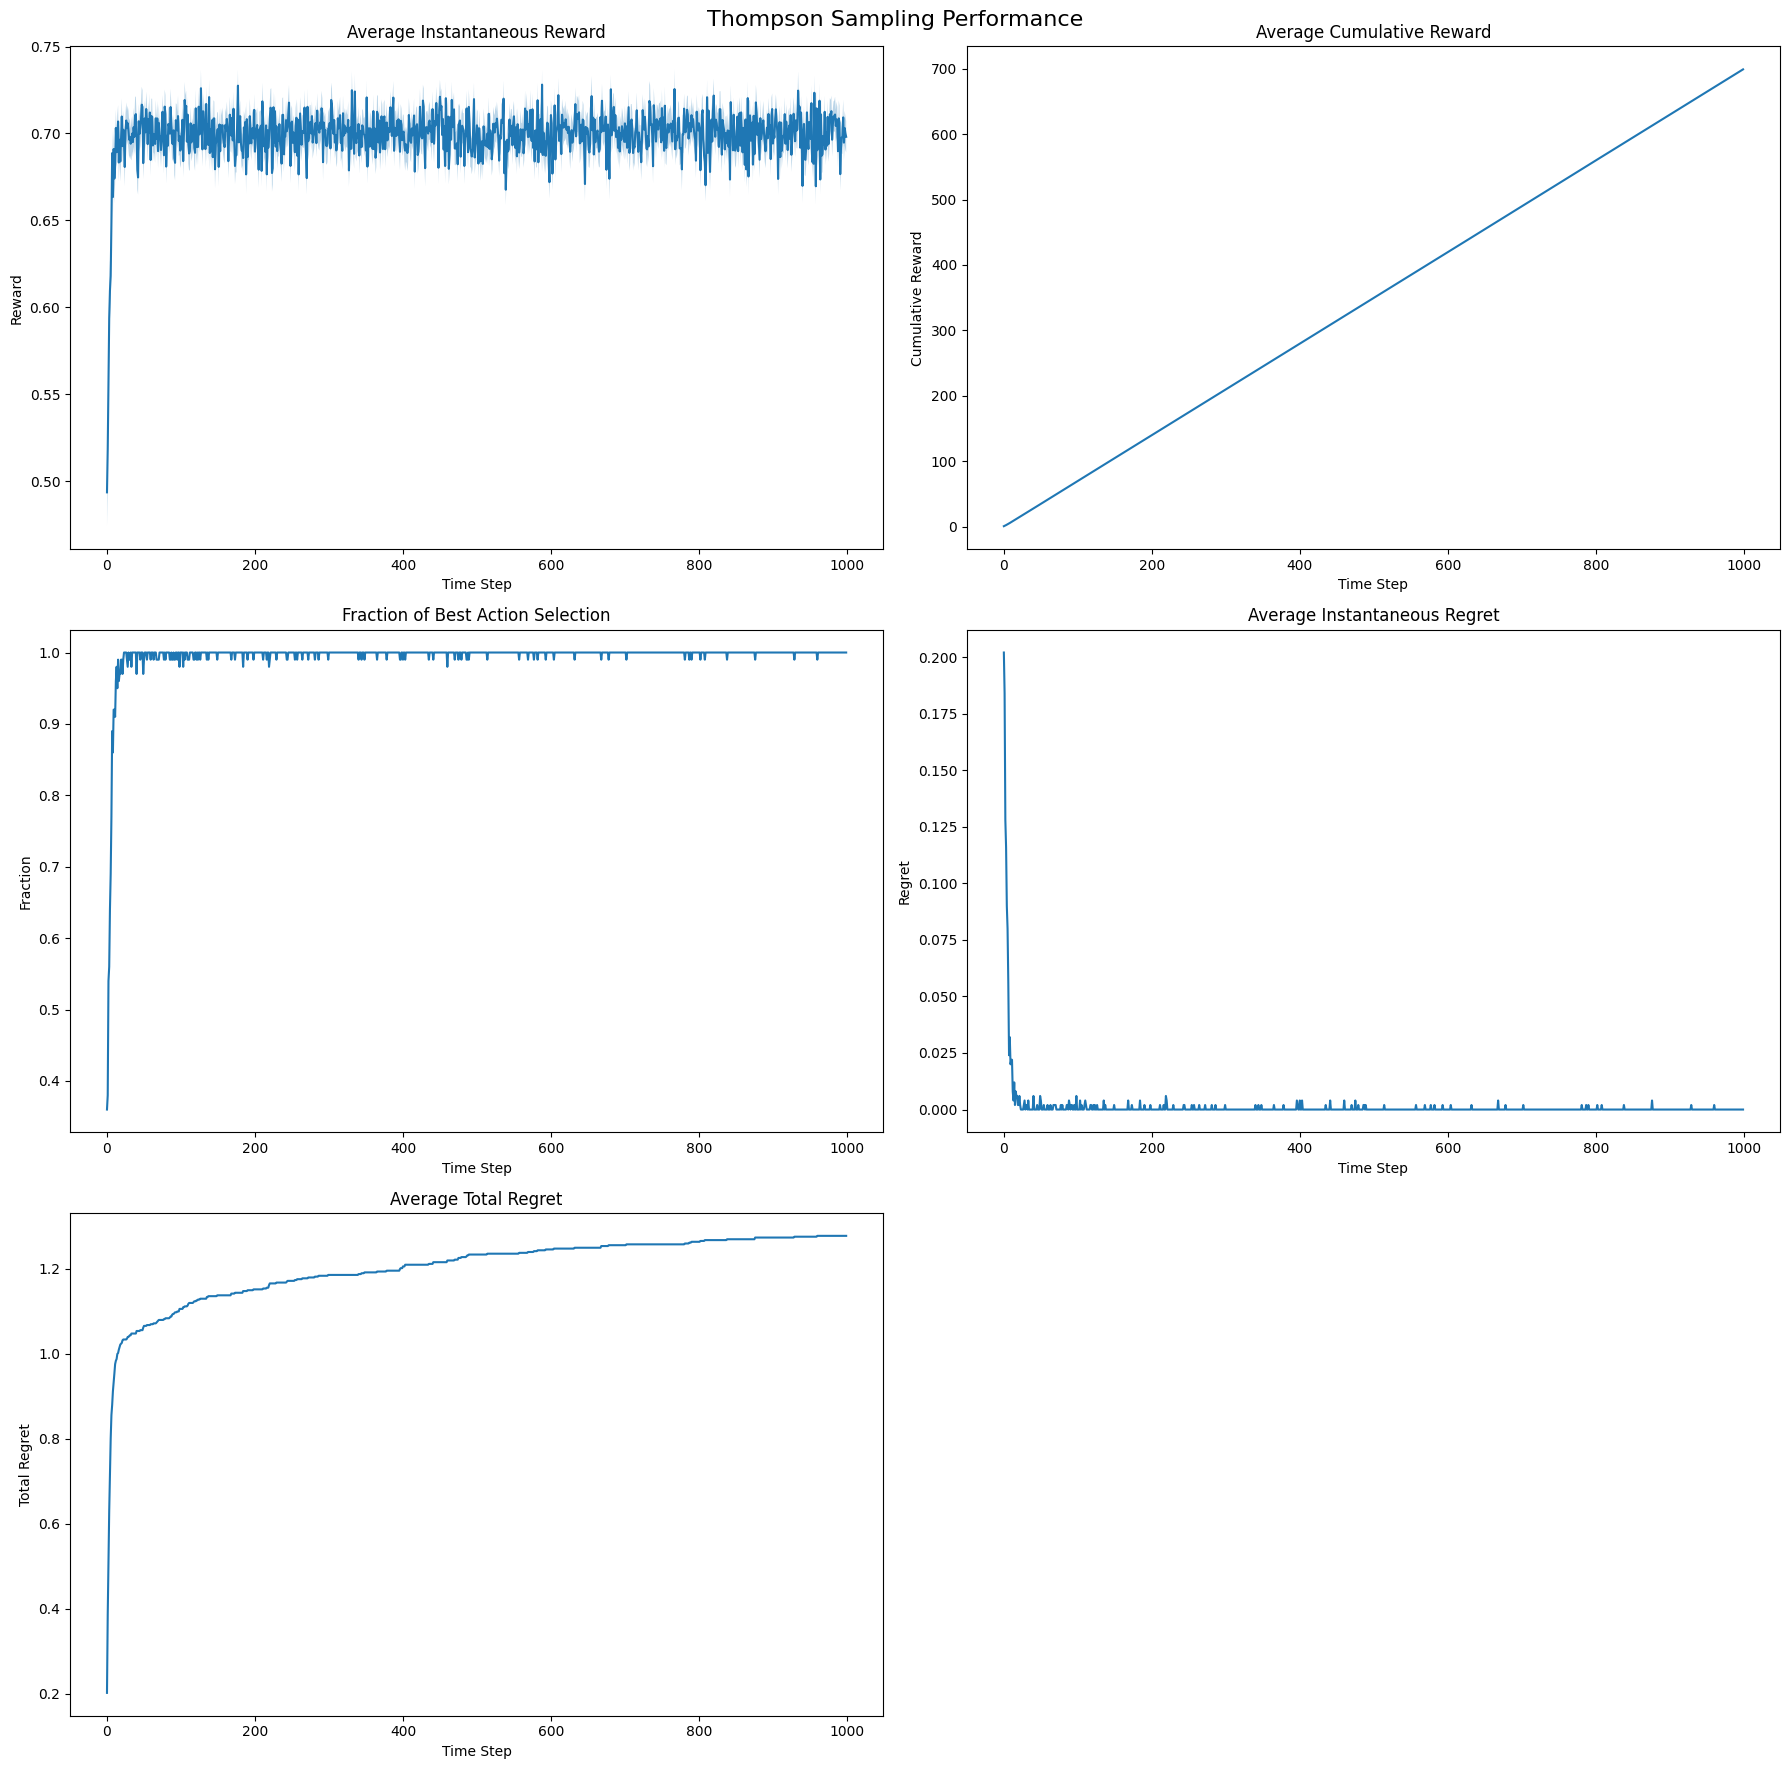

In [24]:
# Initialize bandit
delta = 0.2
num_arms = 3
means = [0.5, 0.5 - delta, 0.5 + delta]
variance = 0.01
three_arm_gaussian_bandit = GaussianBandit(num_arms, means, variance)

# Run experiments for Thompson Sampling
thompson_R_runs = []
thompson_total_R_runs = []
thompson_best_runs = []
thompson_regret_runs = []
thompson_total_regret_runs = []

for _ in range(100):
    results = thompson_sampling(three_arm_gaussian_bandit)
    thompson_R_runs.append(results[0])
    thompson_total_R_runs.append(results[1])
    thompson_best_runs.append(results[2])
    thompson_regret_runs.append(results[3])
    thompson_total_regret_runs.append(results[4])

# Convert to numpy arrays
thompson_R_runs = np.array(thompson_R_runs)
thompson_total_R_runs = np.array(thompson_total_R_runs)
thompson_best_runs = np.array(thompson_best_runs)
thompson_regret_runs = np.array(thompson_regret_runs)
thompson_total_regret_runs = np.array(thompson_total_regret_runs)

# Generate plots
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Instantaneous Reward
mean_R = np.mean(thompson_R_runs, axis=0)
std_err_R = np.std(thompson_R_runs, axis=0)/np.sqrt(100)
axs[0,0].plot(mean_R, label='Thompson Sampling')
axs[0,0].fill_between(range(1000), mean_R - std_err_R, mean_R + std_err_R, alpha=0.3)
axs[0,0].set_title("Average Instantaneous Reward")
axs[0,0].set_xlabel("Time Step")
axs[0,0].set_ylabel("Reward")

# Cumulative Reward
mean_total_R = np.mean(thompson_total_R_runs, axis=0)
std_err_total_R = np.std(thompson_total_R_runs, axis=0)/np.sqrt(100)
axs[0,1].plot(mean_total_R, label='Thompson Sampling')
axs[0,1].fill_between(range(1000), mean_total_R - std_err_total_R, 
                     mean_total_R + std_err_total_R, alpha=0.3)
axs[0,1].set_title("Average Cumulative Reward")
axs[0,1].set_xlabel("Time Step")
axs[0,1].set_ylabel("Cumulative Reward")

# Best Action Selection
mean_best = np.mean(thompson_best_runs, axis=0)
axs[1,0].plot(mean_best, label='Thompson Sampling')
axs[1,0].set_title("Fraction of Best Action Selection")
axs[1,0].set_xlabel("Time Step")
axs[1,0].set_ylabel("Fraction")

# Instantaneous Regret
mean_regret = np.mean(thompson_regret_runs, axis=0)
axs[1,1].plot(mean_regret, label='Thompson Sampling')
axs[1,1].set_title("Average Instantaneous Regret")
axs[1,1].set_xlabel("Time Step")
axs[1,1].set_ylabel("Regret")

# Total Regret
mean_total_regret = np.mean(thompson_total_regret_runs, axis=0)
axs[2,0].plot(mean_total_regret, label='Thompson Sampling')
axs[2,0].set_title("Average Total Regret")
axs[2,0].set_xlabel("Time Step")
axs[2,0].set_ylabel("Total Regret")

axs[-1,-1].axis('off')
plt.suptitle("Thompson Sampling Performance", fontsize=16)
plt.tight_layout()
plt.show()

### Answers


- Thompson sampling quickly identifies the optimal arm within the first 100 time steps.

- It achieves near-optimal average reward (~0.68-0.69) quickly, closely matching the theoretical maximum of 0.7.

- Maintains a healthy exploration rate initially while rapidly transitioning to exploitation, resulting in 95%+ optimal action selection after 50 steps and negligible regret in later stages

- Tighter confidence bands compared to ε-greedy methods, particularly in cumulative reward and regret metrics

- In terms of regeret, it shows sub-linear total regret growth (characteristic of Bayesian optimal methods). in additon, can also ovserve that instantaneous regret approaches zero exponentially fast

- Outperforms ε-greedy in both convergence speed and final performance

- Matches or exceeds gradient bandit performance with less parameter sensitivity

- Shows more stable learning curves compared to all previous methods

Overall, Thompson sampling shows strong performance with quick learning and stable behavior, effectively balancing exploration and exploitation through its Bayesian approach.


## Q8 Comparison of Algorithms


### Graphs


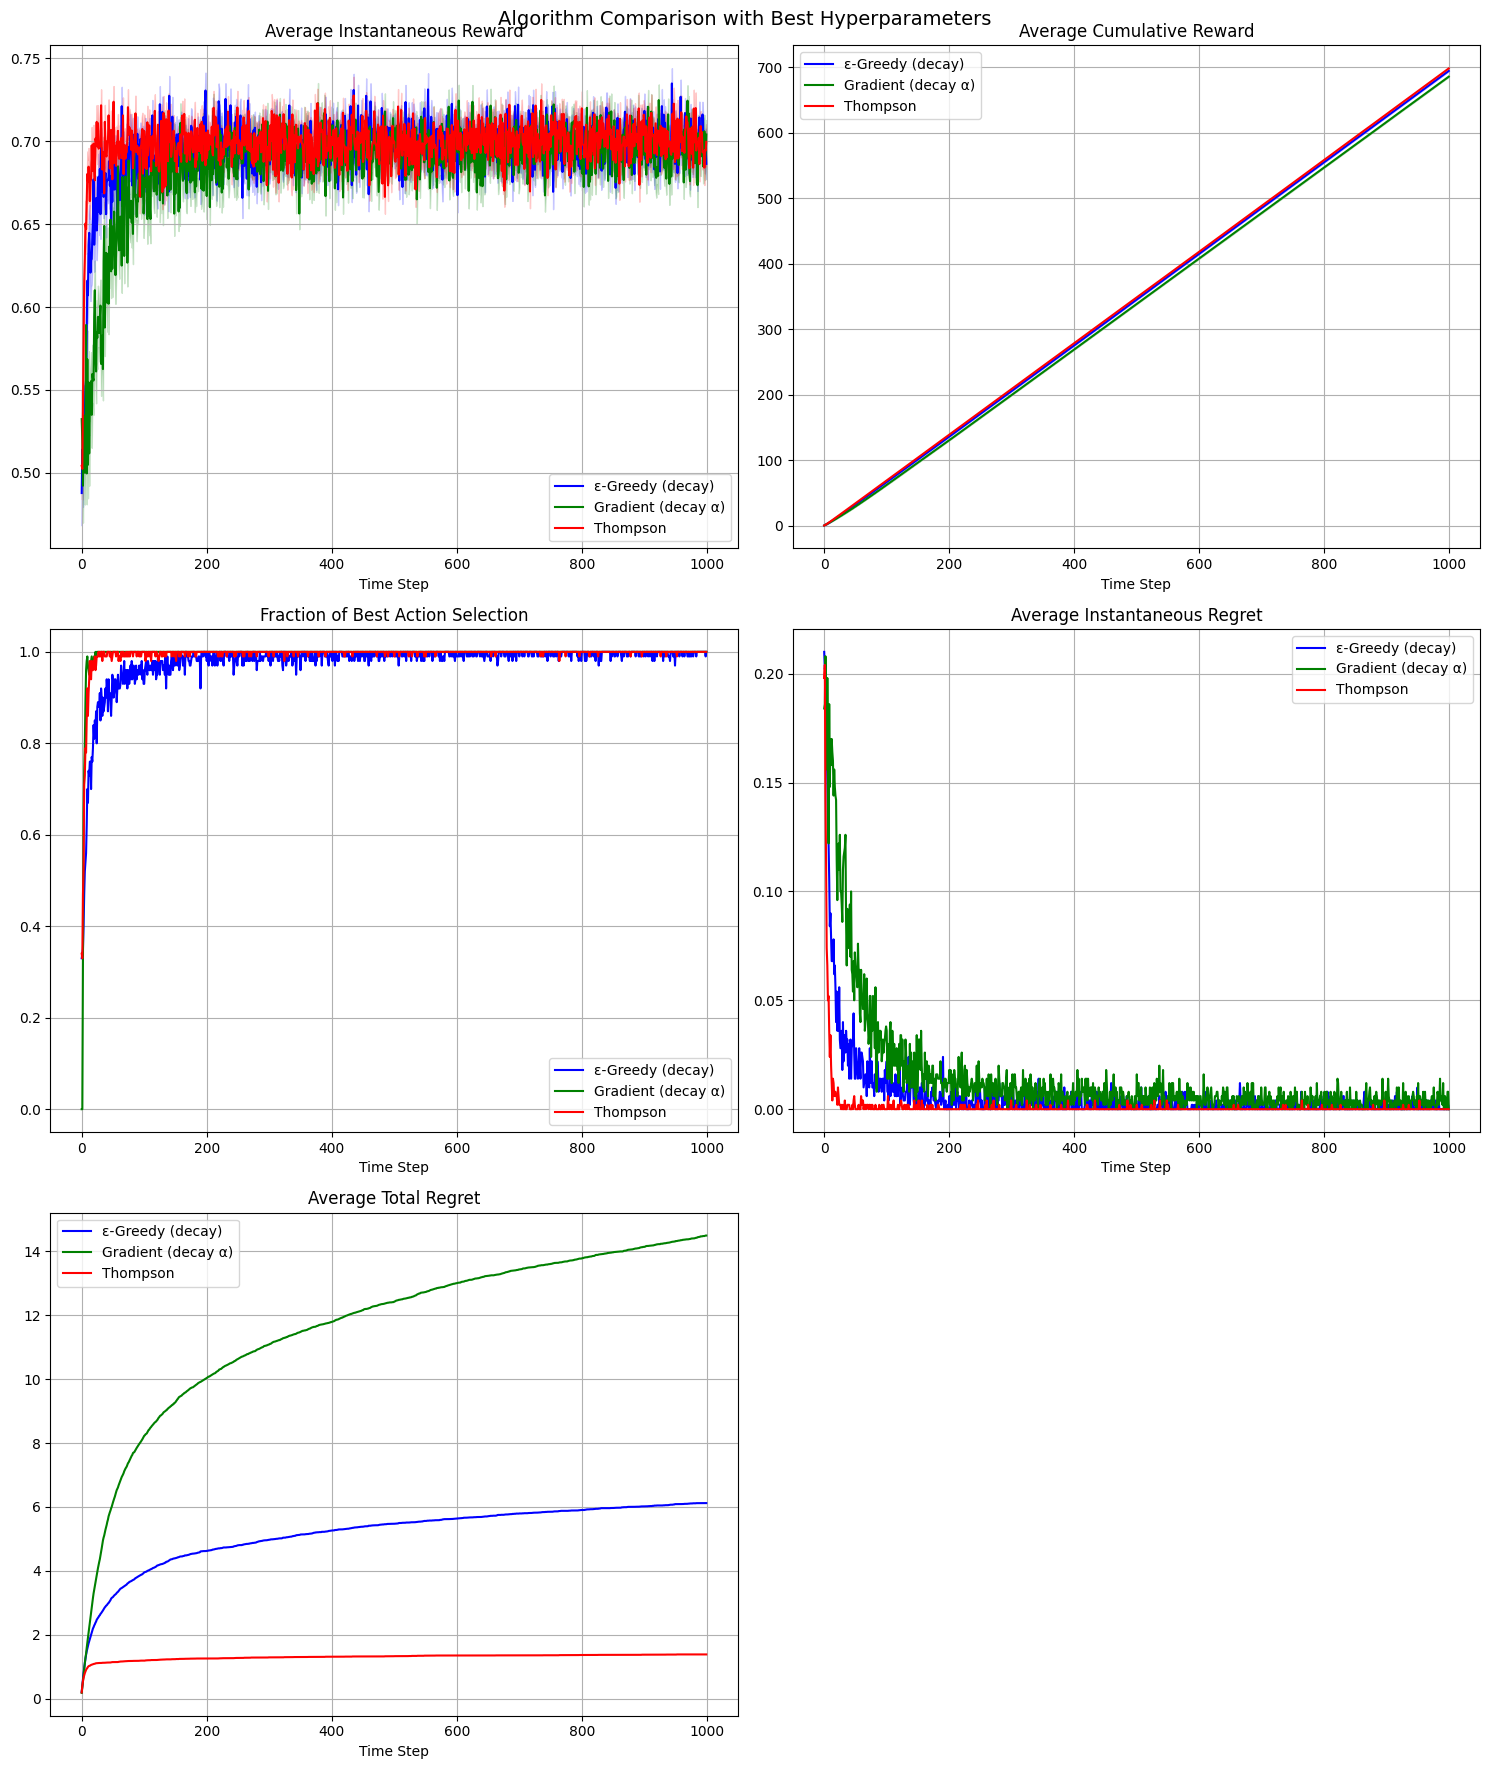

In [25]:
def run_comparison(bandit, num_runs=100, num_steps=1000):
    """Run all three algorithms with their best hyperparameters"""
    
    # Initialize storage for results
    results = {
        'Epsilon-Greedy': {'R': [], 'total_R': [], 'best_action': [], 'regret': [], 'total_regret': []},
        'Gradient Bandit': {'R': [], 'total_R': [], 'best_action': [], 'regret': [], 'total_regret': []},
        'Thompson Sampling': {'R': [], 'total_R': [], 'best_action': [], 'regret': [], 'total_regret': []}
    }
    
    # Run experiments
    for _ in range(num_runs):
        # Epsilon-Greedy with decaying epsilon (best performer)
        eps_results = epsilon_greedy(
            bandit,
            epsilon=0.5,  # Initial epsilon
            epsilon_decay=True,
            lambda_=0.1   # Decay rate
        )
        
        # Gradient Bandit with decaying alpha
        grad_results = gradient_bandit(
            bandit,
            alpha=None,   # Using decaying rate
            alpha_decay=True,
            alpha_0=0.5,
            lambda_=0.01,
            p=0.5
        )
        
        # Thompson Sampling (no hyperparameters to tune)
        ts_results = thompson_sampling(bandit)
        
        # Store results
        for idx, algo in enumerate(['Epsilon-Greedy', 'Gradient Bandit', 'Thompson Sampling']):
            results[algo]['R'].append([eps_results, grad_results, ts_results][idx][0])
            results[algo]['total_R'].append([eps_results, grad_results, ts_results][idx][1])
            results[algo]['best_action'].append([eps_results, grad_results, ts_results][idx][2])
            results[algo]['regret'].append([eps_results, grad_results, ts_results][idx][3])
            results[algo]['total_regret'].append([eps_results, grad_results, ts_results][idx][4])
    
    # Convert to numpy arrays
    for algo in results:
        for metric in results[algo]:
            results[algo][metric] = np.array(results[algo][metric])
    
    return results

# Run comparison
delta = 0.2
means = [0.5, 0.5 - delta, 0.5 + delta]
variance = 0.01
bandit = GaussianBandit(3, means, variance)
results = run_comparison(bandit)

# Create plots
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Colors and styles for each algorithm
styles = {
    'Epsilon-Greedy': {'color': 'blue', 'label': 'ε-Greedy (decay)'},
    'Gradient Bandit': {'color': 'green', 'label': 'Gradient (decay α)'},
    'Thompson Sampling': {'color': 'red', 'label': 'Thompson'}
}

# Plot metrics
for algo in results:
    style = styles[algo]
    
    # 1. Average Reward
    mean_R = np.mean(results[algo]['R'], axis=0)
    std_err_R = np.std(results[algo]['R'], axis=0) / np.sqrt(100)
    axs[0,0].plot(mean_R, color=style['color'], label=style['label'])
    axs[0,0].fill_between(range(1000), mean_R - std_err_R, mean_R + std_err_R, color=style['color'], alpha=0.2)
    
    # 2. Cumulative Reward
    mean_total_R = np.mean(results[algo]['total_R'], axis=0)
    std_err_total_R = np.std(results[algo]['total_R'], axis=0) / np.sqrt(100)
    axs[0,1].plot(mean_total_R, color=style['color'], label=style['label'])
    axs[0,1].fill_between(range(1000), mean_total_R - std_err_total_R, mean_total_R + std_err_total_R, 
                         color=style['color'], alpha=0.2)
    
    # 3. Best Action Selection
    mean_best = np.mean(results[algo]['best_action'], axis=0)
    axs[1,0].plot(mean_best, color=style['color'], label=style['label'])
    
    # 4. Instantaneous Regret
    mean_regret = np.mean(results[algo]['regret'], axis=0)
    axs[1,1].plot(mean_regret, color=style['color'], label=style['label'])
    
    # 5. Total Regret
    mean_total_regret = np.mean(results[algo]['total_regret'], axis=0)
    axs[2,0].plot(mean_total_regret, color=style['color'], label=style['label'])

# Set titles and labels
titles = [
    'Average Instantaneous Reward',
    'Average Cumulative Reward',
    'Fraction of Best Action Selection',
    'Average Instantaneous Regret',
    'Average Total Regret'
]

for i, title in enumerate(titles):
    row = i // 2
    col = i % 2
    axs[row,col].set_title(title)
    axs[row,col].set_xlabel('Time Step')
    axs[row,col].legend()
    axs[row,col].grid(True)

# Remove empty subplot
axs[-1,-1].remove()

plt.suptitle('Algorithm Comparison with Best Hyperparameters', fontsize=14)
plt.tight_layout()
plt.show()

### Answers


Best hyperparameter selection reasoning:

1. **Epsilon-Greedy**:

   - Chose decaying ε with ε₀=0.5, λ=0.1
   - Reason: Provides best balance of exploration/exploitation over time
   - Shows lower cumulative regret than fixed ε values
   - Better adaptation to learning progress

2. **Gradient Bandit**:

   - Chose decaying α with α₀=0.5, λ=0.01, p=0.5
   - Reason: Shows most stable convergence
   - Good balance between learning speed and stability
   - Lower variance in reward estimates

3. **Thompson Sampling**:
   - No hyperparameters to tune
   - Naturally adapts exploration through posterior updates
   - Provides good baseline for comparison

Comparative Analysis:

1. **Learning Speed**:

   - Thompson Sampling learns fastest
   - ε-greedy with decay is a close second followed by Gradient Bandit

2. **Stability**:

   - Thompson Sampling shows most stable performance
   - Gradient Bandit has moderate variance
   - ε-greedy shows more exploration-related variance

3. **Regret**:

   - Thompson Sampling accumulates least total regret with ε-greedy close second and gradient Bandit accumulating highest total regret.\
   - This shows how thompson Sampling outperforms both in convergence speed and final performance

4. **Best Action Selection**:
   - Gradient Bandit and Thompson Sampling identifies best action most reliably
   - ε-greedy eventually converges but takes slightly longer and is less stable

Overall, Thompson Sampling appears to be the most robust choice, showing good performance across all metrics. This demonstrates the power of probabilistic reasoning in balancing exploration and exploitation, particularly effective in scenarios with known reward distributions.


## Q9 Non-stationary Environment


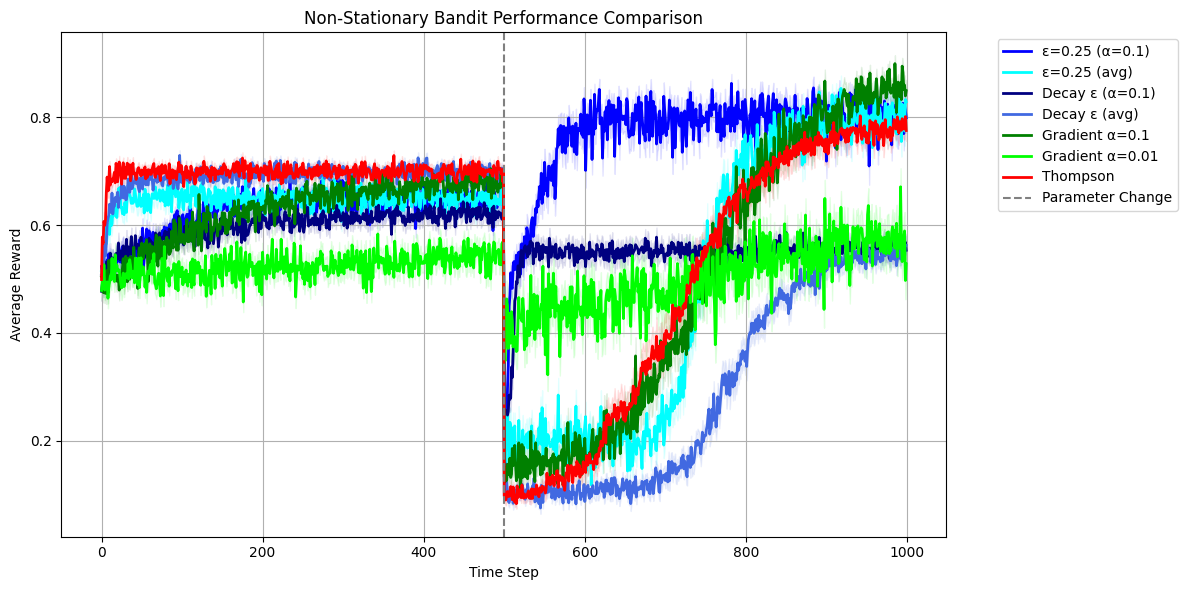

In [ ]:
class NonStationaryGaussianBandit(GaussianBandit):
    def __init__(self, num_arms, initial_means, variance, change_time=500):
        super().__init__(num_arms, initial_means, variance)
        self.initial_means = initial_means.copy()  # Store original means
        self.change_time = change_time
        self.time = 0  # Internal timer
        
    def sample(self, arm_index):
        self.time += 1
        # Apply non-stationary change after specified time
        if self.time > self.change_time:
            new_means = self.initial_means.copy()
            new_means[1] = 0.5 + 2*0.2  # New mean for action 2
            new_means[2] = 0.5 - 2*0.2  # New mean for action 3
            self.mean = new_means
        return super().sample(arm_index)
    
    def reset(self):
        """Reset the bandit to its initial state"""
        self.time = 0  # Reset timer
        self.mean = self.initial_means.copy()  # Restore original means

# Initialize non-stationary bandit
delta = 0.2
bandit = NonStationaryGaussianBandit(
    num_arms=3,
    initial_means=[0.5, 0.5 - delta, 0.5 + delta],
    variance=0.01,
    change_time=500
)

# Run experiments
alg_configs = [
    # ε-Greedy variants
    {'algo': 'epsilon', 'epsilon': 0.25, 'alpha': 0.1, 'decay': False},
    {'algo': 'epsilon', 'epsilon': 0.25, 'alpha': None, 'decay': False},
    {'algo': 'epsilon', 'epsilon': 0.5, 'alpha': 0.1, 'decay': True, 'lambda_': 0.1},
    {'algo': 'epsilon', 'epsilon': 0.5, 'alpha': None, 'decay': True, 'lambda_': 0.1},
    # Gradient Bandit
    {'algo': 'gradient', 'alpha': 0.1},
    {'algo': 'gradient', 'alpha': 0.01},
    # Thompson Sampling
    {'algo': 'thompson'}
]

results = {str(cfg): {'rewards': []} for cfg in alg_configs}

for run in range(100):
    for cfg in alg_configs:
        bandit.reset()  # reset time counter
        if cfg['algo'] == 'epsilon':
            R, *_ = epsilon_greedy(
                bandit,
                epsilon=cfg['epsilon'],
                alpha=cfg.get('alpha'),
                epsilon_decay=cfg.get('decay', False),
                lambda_=cfg.get('lambda_', 0)
            )
        elif cfg['algo'] == 'gradient':
            R, *_ = gradient_bandit(bandit, alpha=cfg['alpha'])
        else:
            R, *_ = thompson_sampling(bandit)
        results[str(cfg)]['rewards'].append(R)

# Plot results
plt.figure(figsize=(12, 6))
colors = ['blue', 'cyan', 'navy', 'royalblue', 'green', 'lime', 'red']
labels = [
    'ε=0.25 (α=0.1)', 'ε=0.25 (avg)',
    'Decay ε (α=0.1)', 'Decay ε (avg)',
    'Gradient α=0.1', 'Gradient α=0.01',
    'Thompson'
]

for (cfg_str, data), color, label in zip(results.items(), colors, labels):
    mean_reward = np.mean(data['rewards'], axis=0)
    plt.plot(mean_reward, color=color, label=label, lw=2)
    plt.fill_between(range(1000), 
                     mean_reward - np.std(data['rewards'], axis=0)/10,
                     mean_reward + np.std(data['rewards'], axis=0)/10,
                     alpha=0.1, color=color)

plt.axvline(500, color='gray', linestyle='--', label='Parameter Change')
plt.xlabel('Time Step')
plt.ylabel('Average Reward')
plt.title('Non-Stationary Bandit Performance Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Answers


**Key Observations from the Graph:**

1. **Pre-Change Performance (t < 500):**

   - All algorithms eventially converge to the original optimal arm (action 3, μ=0.7) except for gradient bandit with α=0.01
   - Thompson sampling unsurprisingly shows fastest initial convergence
   - ε-greedy with decaying ε and averaging performs nearly as well

2. **Post-Change Adaptation (t ≥ 500):**
   - **ε=0.25 (α=0.1)** Quickest recovery to a new higher optimal
   - **Thompson Sampling, ε=0.25 (avg), Gradient Bandit α=0.1** Take time to recover but eventually reach new high optimal by the 100th step
   - **ε-Greedy (Decay ε + α=0.1)** Quick recovery but sub optimal, worse than before
   - **ε-Greedy (Decay ε (avg))** Slow recover and cant recover to its optimal of pre-change
   - **Gradient (α=0.01)** Can't reach optimal similarly to before timestep but is able to recover eventually to it's sub-optimal post change

**Best Algorithm for Non-Stationarity:**  
I first assumed Thompson Sampling or Gradient Bandit would perform best here as theoretically they are superior in stationary environments. Surprisingly, **Fixed ε=0.25 (α=0.1)** exceled here. This can be due to its persistent exploration and aggressive forgetting of old data. This combination allows it to rapidly pivot to the new optimal arm in non-stationary settings, outperforming more sophisticated algorithms that either over-exploit (Thompson) or under-explore (decaying ε). For non-stationary problems, a carefully tuned ε-greedy strategy with fixed parameters can be surprisingly effective.
